# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">1. Business Understanding</p>

##### Global pandemi yang terjadi di dunia saat ini bernama SARS-CoV-2 atau disebut juga sebagai COVID-19 telah memakan banyak korban jiwa. Pemerintah secara khusus memberlakukan pencegahan-pencegahan dari gejala covid yang muncul. Berdasarkan hasil wawancara, research journal dan observasi pada Puskesmas Pakuhaji yang merupakan Unit Pelaksana Teknis Dinas (UPTD) kesehatan kabupaten/kota yang bertanggung jawab untuk memutus mata rantai penyebaran covid khususnya di daerah Pakuhaji dan sekitarnya. Banyak terdapat kasus tanpa gejala dan kurangnya diagnosis mengakibatkan keterlambatan atau bahkan diagnosis yang terlewatkan, membuat pasien terpapar covid. Oleh karena itu penulis mencoba menggunakan pendekatan non-klinis yaitu menggunakan pembelajaran mesin, penambangan data, dan kecerdasan buatan untuk mendiagnosis gejala awal virus serta menekan bertambahnya kasus COVID-19

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">2. Data Understanding</p>

In [ ]:
# Import library untuk manipulasi data
import pandas as pd  # Untuk pengolahan data tabular
import numpy as np   # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data
import seaborn as sns  # Untuk visualisasi data statistik
from skimpy import skim # Import library skimpy untuk mendapatkan ringkasan statistik data yang lebih detail dan mudah dibaca
from summarytools import dfSummary # Import library summarytools untuk membuat ringkasan data yang komprehensif termasuk statistik, distribusi, dan missing values

# Import library untuk preprocessing data
from sklearn.model_selection import train_test_split  # Untuk membagi data train dan test
from sklearn.preprocessing import LabelEncoder  # Untuk encoding label kategorikal
from imblearn.over_sampling import SMOTE  # Untuk menangani data tidak seimbang

# Import library untuk model machine learning
from sklearn.tree import DecisionTreeClassifier  # Model pohon keputusan
from sklearn.ensemble import RandomForestClassifier  # Model random forest
from sklearn.naive_bayes import GaussianNB  # Model naive bayes

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Metrik evaluasi
from sklearn.metrics import roc_curve, auc  # Untuk kurva ROC dan nilai AUC

# Mengatur matplotlib untuk menampilkan plot di notebook
%matplotlib inline

In [ ]:
# Memuat dataset
df = pd.read_csv('data_apartment.csv')  

df

In [ ]:
# for loading dataset
from dataprep.datasets import load_dataset
# importing function from DataPrep.eda
from dataprep.eda import create_report

In [ ]:
create_report(df)

In [4]:
dfSummary(df)

In [5]:
# Menampilkan semua baris
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2186   │ │ string      │ 55    │                                                          │
│ │ Number of columns │ 68     │ │ int64       │ 11    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column   ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ No       │  0 │    0 │     1094 │    631.2 │        1 │    547.2 │     1094 │     1640 │     2186 │ ▇▇▇▇▇▇ │  │
│ │ Year     │  0 │    0 │     2018 │     2.48 │     2016 │     2017 │     2017 │     2018 │     2025 │ ▇   ▂▁ │  │
│ │ Unit     │  0 │    0 │    16.69 │    10.48 │        1 │        7 │       16 │       26 │       39 │ ▇▆▅▅▅▂ │  │
│ │ Name     │    │      │          │          │          │          │          │          │          │        │  │
│ │ PS Code  │  0 │    0 │ 18220000 │  2423000 │ 16110000 │ 17010000 │ 17030000 │ 19050000 │ 25010000 │ ▇▁▁ ▁▁ │  │
│ │ Gross    │  0 │    0 │    19.06 │    5.155 │     16.5 │     16.5 │     16.5 │     16.5 │       33 │ ▇   ▂  │  │
│ │ Area     │    │      │          │          │          │          │          │          │          │        │  │
│ │ Semi     │  0 │    0 │     29.9 │    7.773 │    26.03 │    26.03 │    26.03 │    26.03 │    52.06 │ ▇   ▂  │  │
│ │ Gross    │    │      │          │          │          │          │          │          │          │        │  │
│ │ Area     │    │      │          │          │          │          │          │          │          │        │  │
│ │ Area     │  0 │    0 │    22.96 │    5.967 │       20 │       20 │       20 │       20 │       40 │ ▇   ▂  │  │
│ │ Price    │  0 │    0 │ 36240000 │ 11160000 │        0 │ 28800000 │ 31720000 │ 42500000 │ 76200000 │   ▇▂▁  │  │
│ │          │    │      │        0 │        0 │          │        0 │        0 │        0 │        0 │        │  │
│ │ Disc     │  0 │    0 │ -1027000 │  9056000 │ -2560000 │        0 │        0 │        0 │        0 │      ▇ │  │
│ │          │    │      │          │          │       00 │          │          │          │          │        │  │
│ │ Add Disc │  0 │    0 │ -3495000 │  5720000 │ -7056000 │ -6155000 │        0 │        0 │  6199000 │     ▁▇ │  │
│ │          │    │      │          │          │        0 │          │          │          │          │        │  │
│ │ Booking  │  0 │    0 │  -903800 │  5156000 │ -6633000 │        0 │        0 │        0 │  2500000 │      ▇ │  │
│ │ Disc     │    │      │          │          │        0 │          │          │          │          │        │  │
│ │ Adjustme │  0 │    0 │   878400 │ 43480000 │ -3760000 │        0 │        0 │        0 │ 39140000 │    ▇▁  │  │
│ │ nt Price │    │      │          │          │       00 │          │          │          │        0 │        │  │
│ │ Net      │  0 │    0 │ 35780000 │ 11020000 │ 2066000

In [6]:
# Menampilkan semua baris
df

No                   Project  Year       Month Booking Status  \
0        1  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
1        2  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
2        3  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
3        4  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
4        5  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
...    ...                       ...   ...         ...            ...   
2181  2182  Serpong Garden Apartment  2025  01/01/2025            New   
2182  2183  Serpong Garden Apartment  2025  01/01/2025            New   
2183  2184  Serpong Garden Apartment  2025  01/01/2025            New   
2184  2185  Serpong Garden Apartment  2025  01/01/2025            New   
2185  2186  Serpong Garden Apartment  2025  01/01/2025            New   

     Sales Referral   Sales Purpose           Sales Event     Sales Location  \
0       Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
1       Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
2       Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
3       Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
4       Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
...             ...             ...                   ...                ...   
2181   Media Social  Tempat Tinggal                Online  Marketing Gallery   
2182        Pameran       Investasi                Online    Pameran Bandung   
2183        Pameran  Tempat Tinggal                Online  Marketing Gallery   
2184        Pameran  Tempat Tinggal                Online    Pameran Bandung   
2185      Referensi  Tempat Tinggal                Online  Marketing Gallery   

             Occupation  ... Customer Income Customer Salary Method  \
0                Swasta  ...     Not Defined            Not Defined   
1                Swasta  ...     Not Defined            Not Defined   
2                Swasta  ...     Not Defined            Not Defined   
3                Swasta  ...     Not Defined            Not Defined   
4                Swasta  ...     Not Defined            Not Defined   
...                 ...  ...             ...                    ...   
2181             Swasta  ...     Not Defined            Not Defined   
2182             Swasta  ...     Not Defined            Not Defined   
2183  Pelajar/Mahasiswa  ...     Not Defined            Not Defined   
2184  Pelajar/Mahasiswa  ...     Not Defined            Not Defined   
2185          Wirausaha  ...     Not Defined            Not Defined   

     Customer Nation Customer Birth Date      Price Disc Add Disc  \
0        Indonesians          10/26/1964  447272000    0 -8945440   
1        Indonesians          10/26/1964  278600000    0 -5572000   
2        Indonesians          09/10/1984  468632000    0 -9372640   
3        Indonesians          08/18/1989  272840000    0 -5456800   
4        Indonesians          10/13/1975  272840000    0        0   
...              ...                 ...        ...  ...      ...   
2181     Indonesians          06/08/1990  628800000    0        0   
2182     Indonesians          05/17/1996  353300000    0        0   
2183     Indonesians          04/03/2001  353300000    0        0   
2184     Indonesians          05/31/1997  353300000    0        0   
2185     Indonesians          04/05/1992  353300000    0        0   

     Booking Disc Adjustment Price  Net Price  
0               0                0  438326560  
1               0                0  273028000  
2               0                0  459259360  
3               0                0  267383200  
4               0                0  272840000  
...           ...              ...        ...  
2181     -4500000        155450000  779750000  
2182     -4500000         86575000  435375000  
2183     -4000000         86075000  435375000  
2184    

In [7]:
# Melihat dimensi data
print("Dimensi data:", df.shape)

Dimensi data: (2186, 68)


In [8]:
# Menampilkan beberapa baris pertama data
print("Baris pertama data:")
df.head()


Baris pertama data:


No                   Project  Year       Month Booking Status  \
0   1  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
1   2  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
2   3  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
3   4  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   
4   5  Serpong Garden Apartment  2016  11/01/2016    SAD Confirm   

  Sales Referral   Sales Purpose           Sales Event     Sales Location  \
0    Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
1    Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
2    Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
3    Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   
4    Not Defined  Tempat Tinggal  Open House Show Unit  Marketing Gallery   

  Occupation  ... Customer Income Customer Salary Method Customer Nation  \
0     Swasta  ...     Not Defined            Not Defined     Indonesians   
1     Swasta  ...     Not Defined            Not Defined     Indonesians   
2     Swasta  ...     Not Defined            Not Defined     Indonesians   
3     Swasta  ...     Not Defined            Not Defined     Indonesians   
4     Swasta  ...     Not Defined            Not Defined     Indonesians   

  Customer Birth Date      Price Disc Add Disc Booking Disc Adjustment Price  \
0          10/26/1964  447272000    0 -8945440            0                0   
1          10/26/1964  278600000    0 -5572000            0                0   
2          09/10/1984  468632000    0 -9372640            0                0   
3          08/18/1989  272840000    0 -5456800            0                0   
4          10/13/1975  272840000    0        0            0                0   

   Net Price  
0  438326560  
1  273028000  
2  459259360  
3  267383200  
4  272840000  

[5 rows x 68 columns]

In [9]:
# Menampilkan beberapa baris terakhir data
print("Baris terakhir data:")
df.tail()

Baris terakhir data:


No                   Project  Year       Month Booking Status  \
2181  2182  Serpong Garden Apartment  2025  01/01/2025            New   
2182  2183  Serpong Garden Apartment  2025  01/01/2025            New   
2183  2184  Serpong Garden Apartment  2025  01/01/2025            New   
2184  2185  Serpong Garden Apartment  2025  01/01/2025            New   
2185  2186  Serpong Garden Apartment  2025  01/01/2025            New   

     Sales Referral   Sales Purpose Sales Event     Sales Location  \
2181   Media Social  Tempat Tinggal      Online  Marketing Gallery   
2182        Pameran       Investasi      Online    Pameran Bandung   
2183        Pameran  Tempat Tinggal      Online  Marketing Gallery   
2184        Pameran  Tempat Tinggal      Online    Pameran Bandung   
2185      Referensi  Tempat Tinggal      Online  Marketing Gallery   

             Occupation  ... Customer Income Customer Salary Method  \
2181             Swasta  ...     Not Defined            Not Defined   
2182             Swasta  ...     Not Defined            Not Defined   
2183  Pelajar/Mahasiswa  ...     Not Defined            Not Defined   
2184  Pelajar/Mahasiswa  ...     Not Defined            Not Defined   
2185          Wirausaha  ...     Not Defined            Not Defined   

     Customer Nation Customer Birth Date      Price Disc Add Disc  \
2181     Indonesians          06/08/1990  628800000    0        0   
2182     Indonesians          05/17/1996  353300000    0        0   
2183     Indonesians          04/03/2001  353300000    0        0   
2184     Indonesians          05/31/1997  353300000    0        0   
2185     Indonesians          04/05/1992  353300000    0        0   

     Booking Disc Adjustment Price  Net Price  
2181     -4500000        155450000  779750000  
2182     -4500000         86575000  435375000  
2183     -4000000         86075000  435375000  
2184     -4500000         86575000  435375000  
2185     -4000000         86075000  435375000  

[5 rows x 68 columns]

In [10]:
# Mengecek tipe data dari setiap kolom
print("Tipe data setiap kolom:")
df.dtypes

Tipe data setiap kolom:


No                   int64
Project             object
Year                 int64
Month               object
Booking Status      object
                     ...  
Disc                 int64
Add Disc             int64
Booking Disc         int64
Adjustment Price     int64
Net Price            int64
Length: 68, dtype: object

In [11]:
# Menghitung statistik deskriptif untuk kolom numerik
print("Statistik deskriptif untuk kolom numerik:")
df.describe()

Statistik deskriptif untuk kolom numerik:


No         Year    Unit Name       PS Code   Gross Area  \
count  2186.000000  2186.000000  2186.000000  2.186000e+03  2186.000000   
mean   1093.500000  2018.209058    16.694876  1.821583e+07    19.055489   
std     631.188165     2.480077    10.482141  2.423170e+06     5.155490   
min       1.000000  2016.000000     1.000000  1.611000e+07    16.500000   
25%     547.250000  2017.000000     7.000000  1.701031e+07    16.500000   
50%    1093.500000  2017.000000    16.000000  1.703030e+07    16.500000   
75%    1639.750000  2018.000000    26.000000  1.905000e+07    16.500000   
max    2186.000000  2025.000000    39.000000  2.501001e+07    33.000000   

       Semi Gross Area         Area         Price          Disc      Add Disc  \
count      2186.000000  2186.000000  2.186000e+03  2.186000e+03  2.186000e+03   
mean         29.898518    22.956999  3.623757e+08 -1.026760e+06 -3.495276e+06   
std           7.772661     5.967416  1.116325e+08  9.056120e+06  5.719973e+06   
min          26.030000    20.000000  0.000000e+00 -2.560000e+08 -7.055721e+07   
25%          26.030000    20.000000  2.879600e+08  0.000000e+00 -6.154720e+06   
50%          26.030000    20.000000  3.172140e+08  0.000000e+00  0.000000e+00   
75%          26.030000    20.000000  4.250000e+08  0.000000e+00  0.000000e+00   
max          52.060000    40.000000  7.620000e+08  0.000000e+00  6.198574e+06   

       Booking Disc  Adjustment Price     Net Price  
count  2.186000e+03      2.186000e+03  2.186000e+03  
mean  -9.037681e+05      8.784166e+05  3.578283e+08  
std    5.155922e+06      4.348190e+07  1.101951e+08  
min   -6.633100e+07     -3.759806e+08  2.066240e+08  
25%    0.000000e+00      0.000000e+00  2.831940e+08  
50%    0.000000e+00      0.000000e+00  3.129140e+08  
75%    0.000000e+00      0.000000e+00  4.003703e+08  
max    2.500000e+06      3.914440e+08  7.797500e+08

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">3. Data Preparation</p>

In [12]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("Nilai yang hilang di setiap kolom:")
df.isnull().sum()

Nilai yang hilang di setiap kolom:


No                  0
Project             0
Year                0
Month               0
Booking Status      0
                   ..
Disc                0
Add Disc            0
Booking Disc        0
Adjustment Price    0
Net Price           0
Length: 68, dtype: int64

In [ ]:
# # Langkah 1: Menangani Missing Values
# # Mengisi nilai yang hilang dengan mean untuk kolom numerik dan mode untuk kolom kategorikal
# for column in df.select_dtypes(include=[np.number]).columns:
#     df[column].fillna(df[column].mean(), inplace=True)

# for column in df.select_dtypes(include=[object]).columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
# Langkah 2: Feature Selection yaitu Menghapus kolom tertentu
columns_to_drop = ['Wearing Masks', 'Sanitization from Market']
df = df.drop(columns=columns_to_drop)

In [ ]:
df

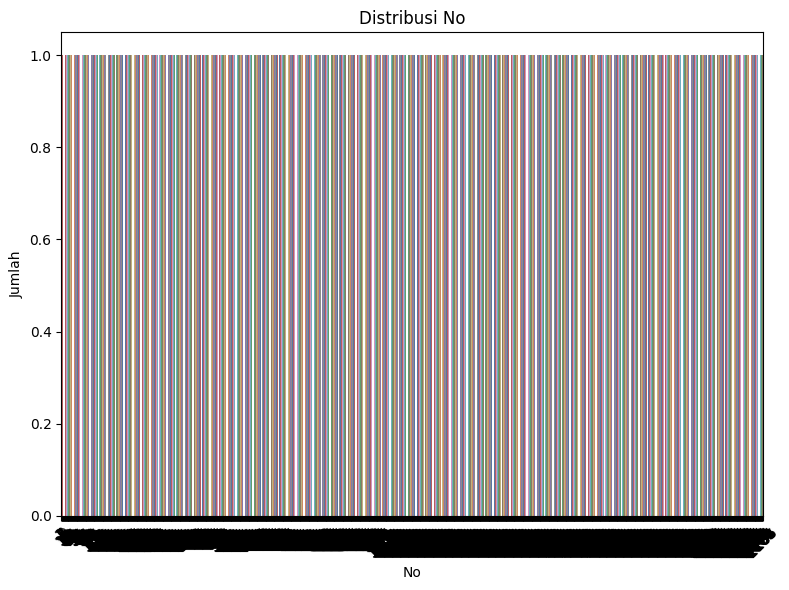

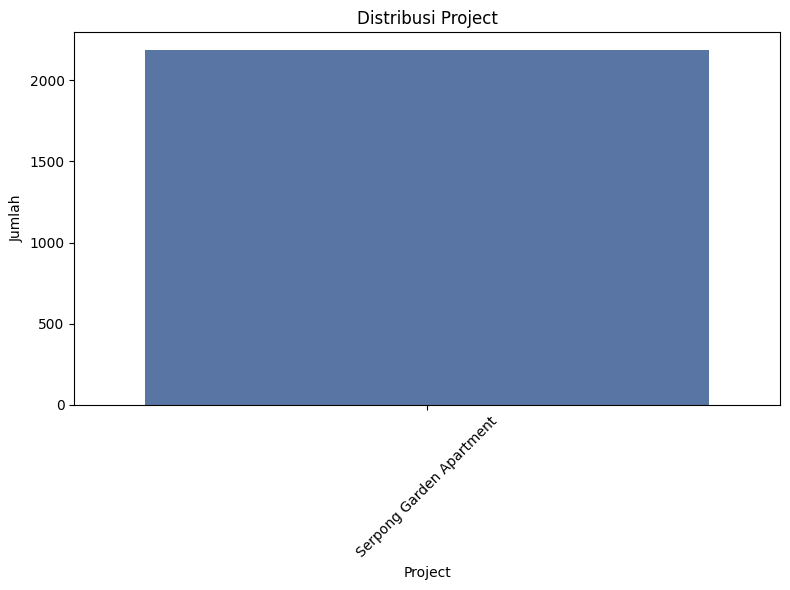

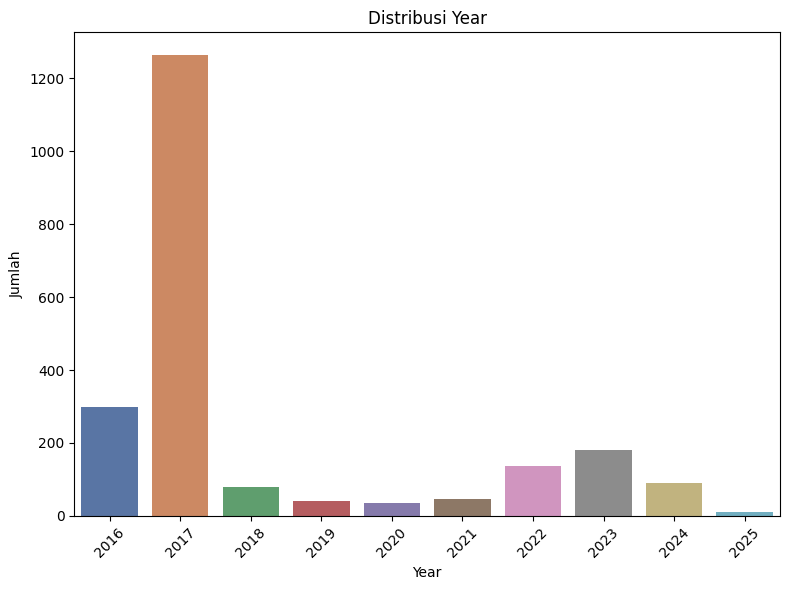

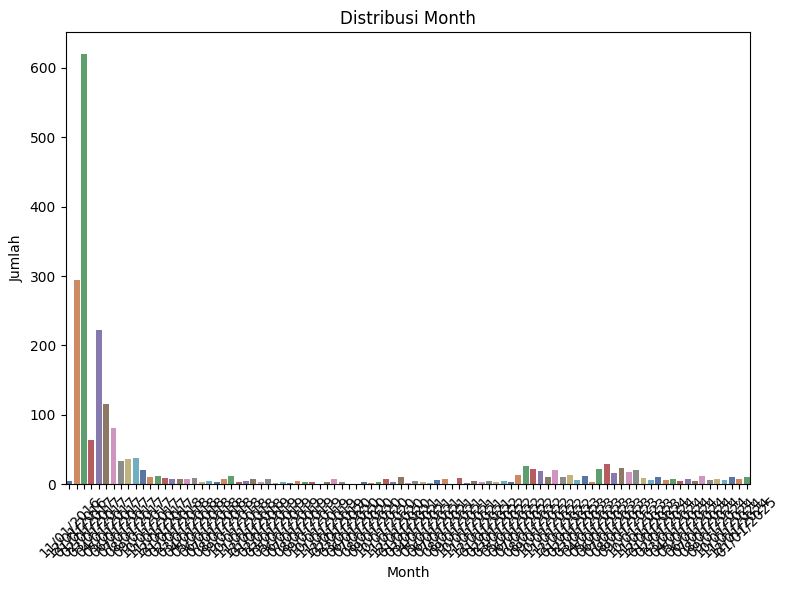

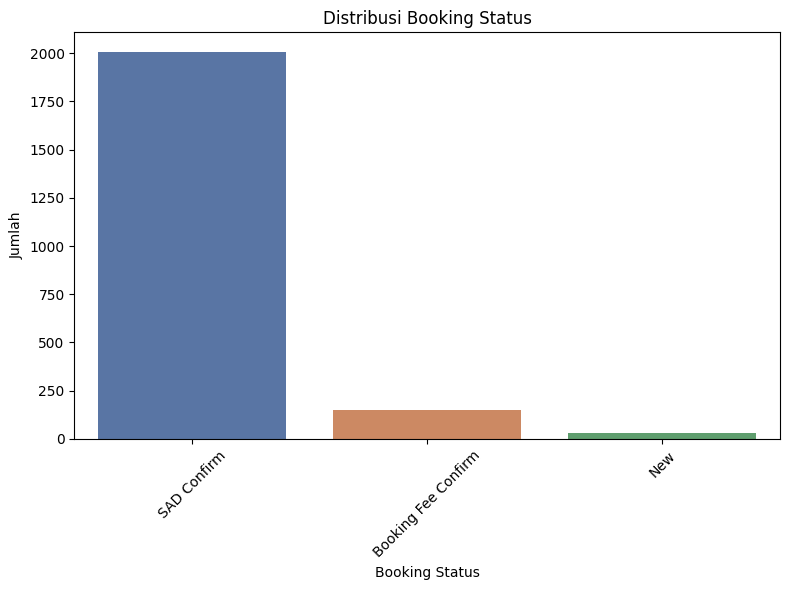

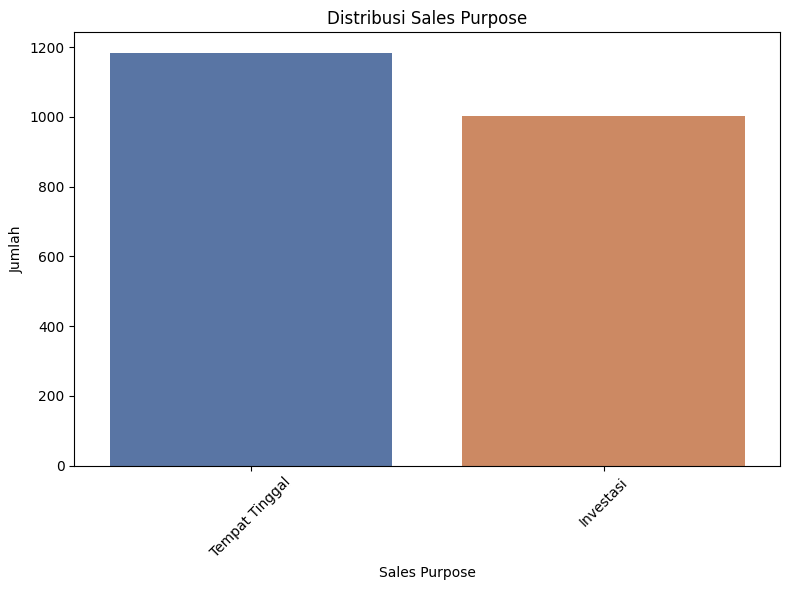

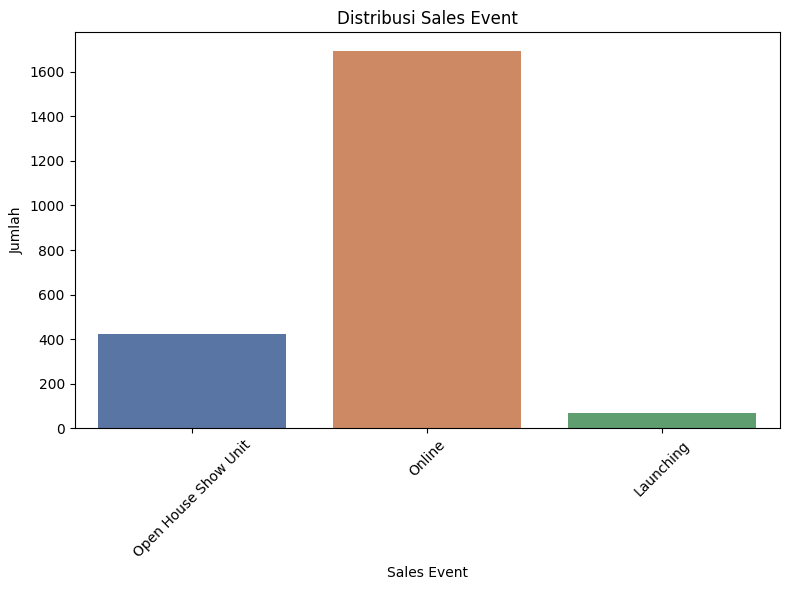

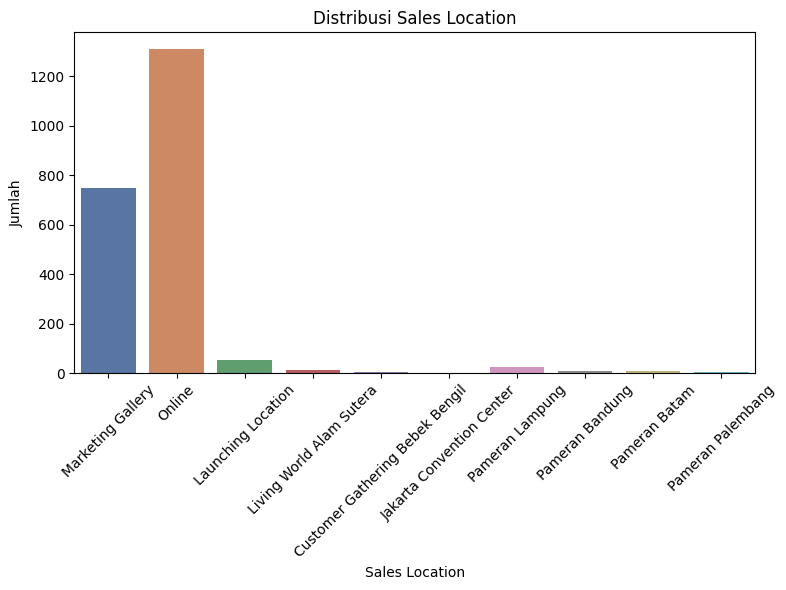

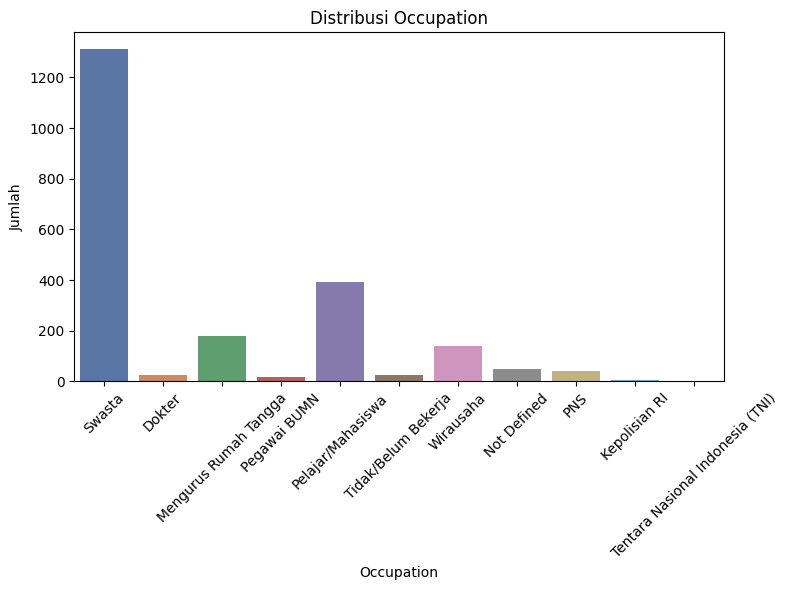

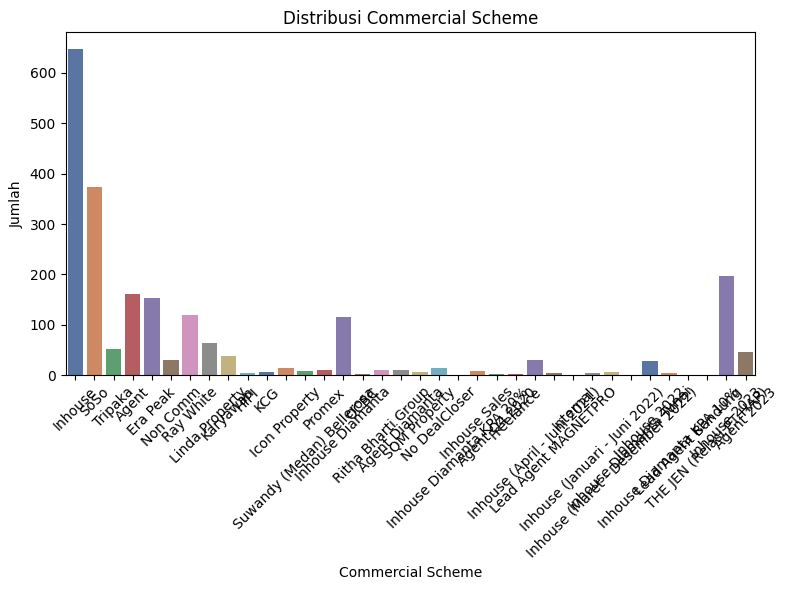

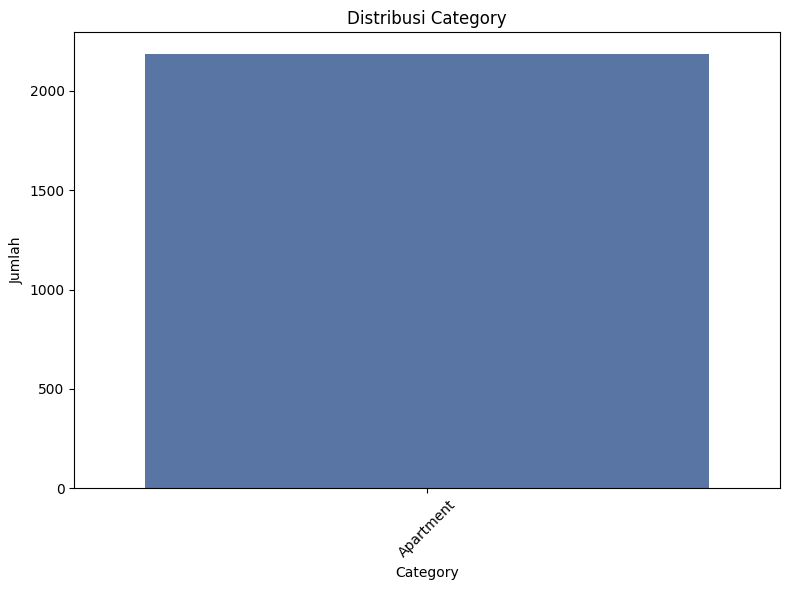

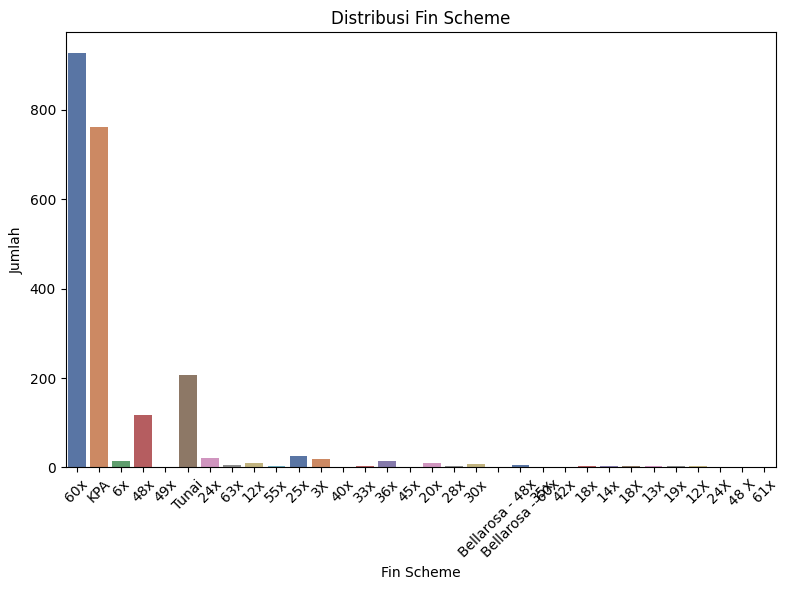

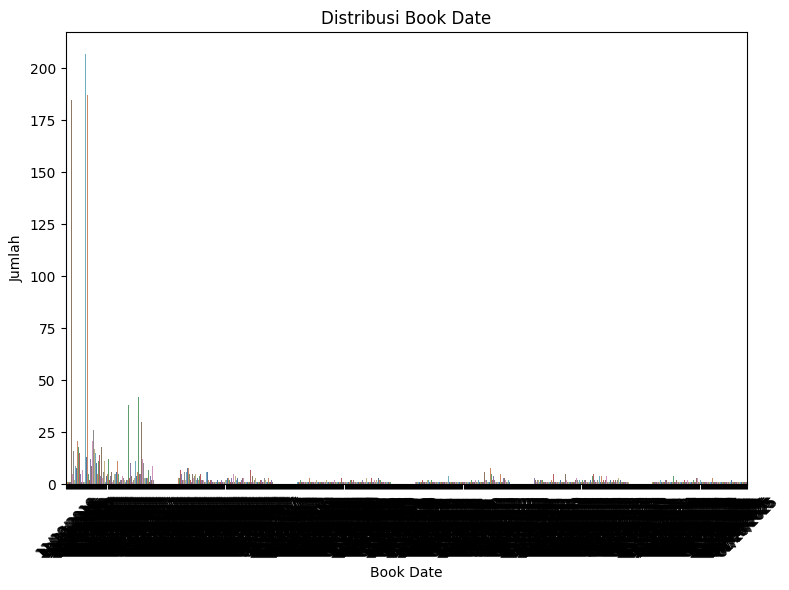

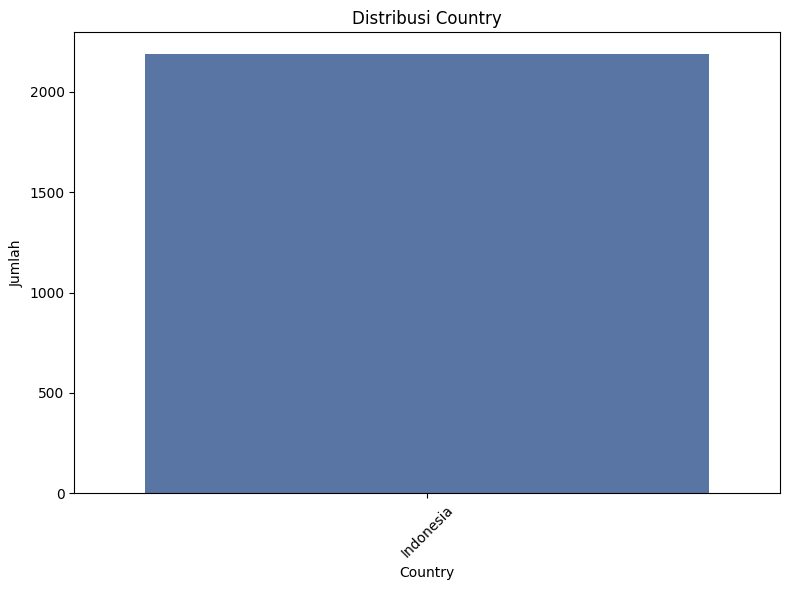

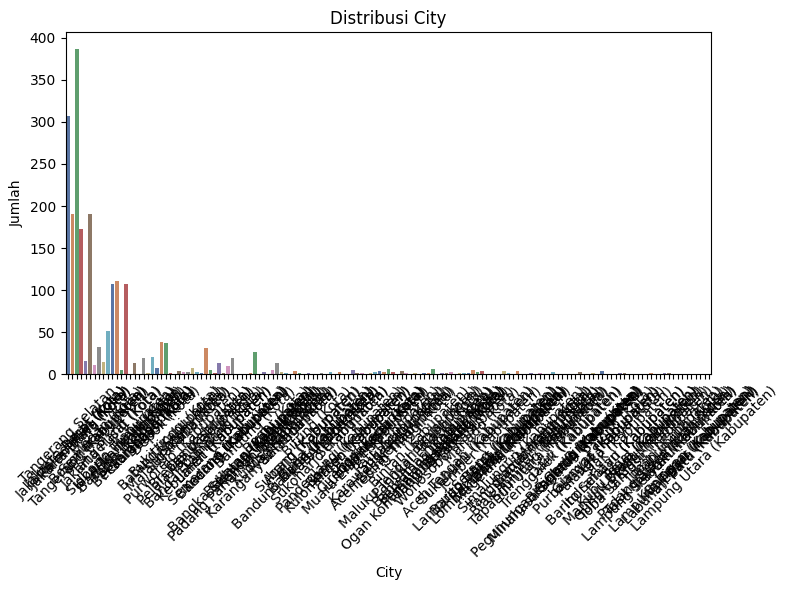

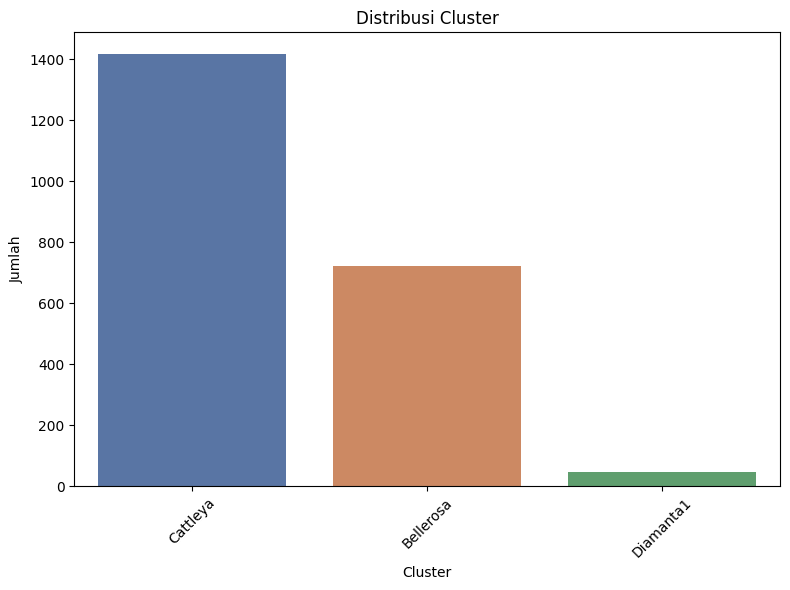

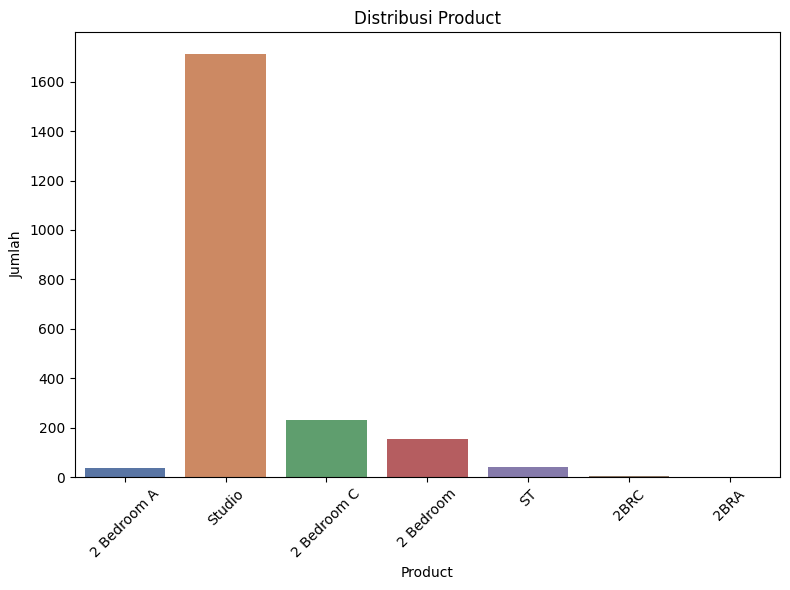

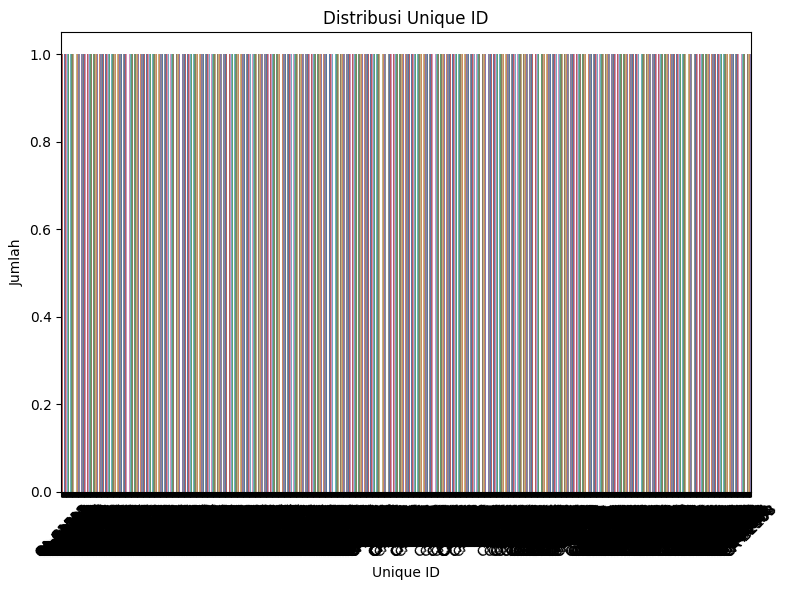

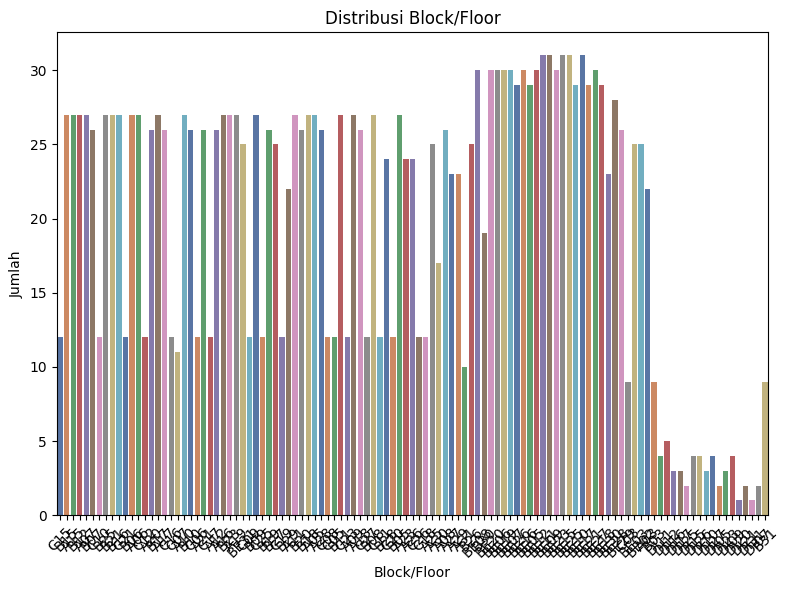

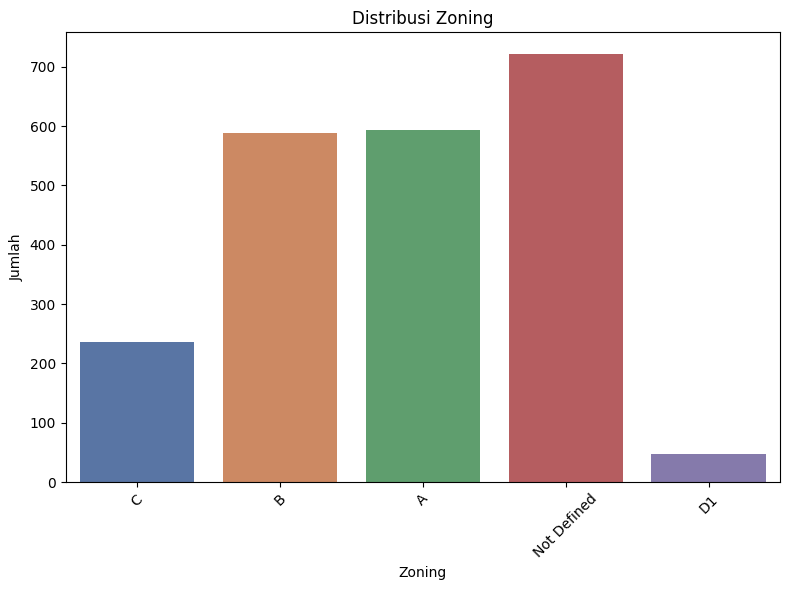

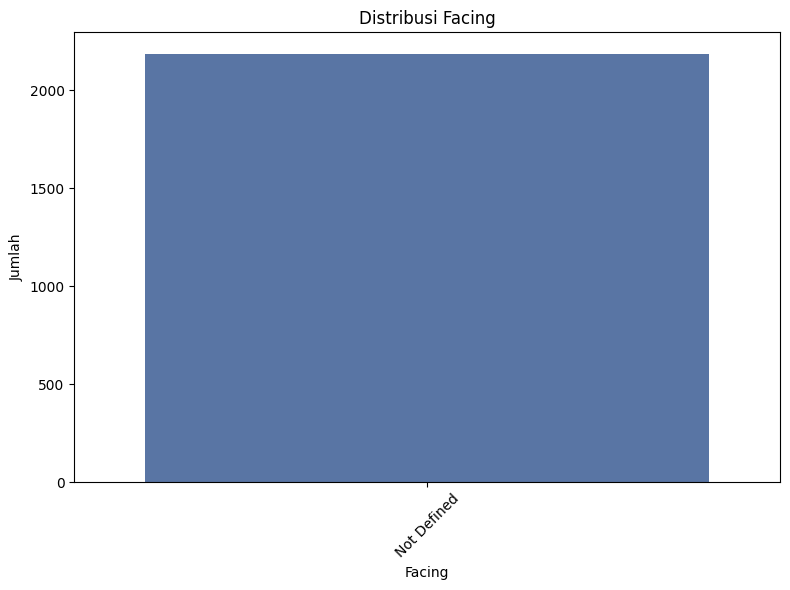

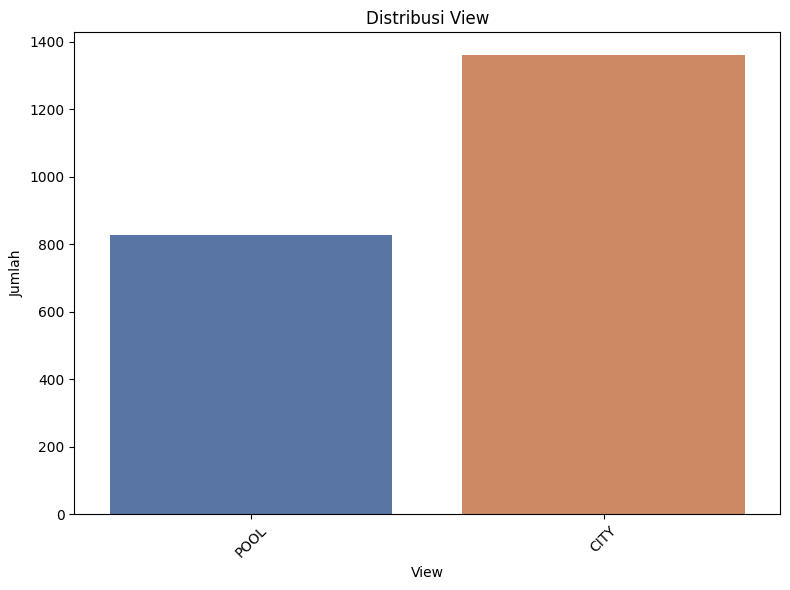

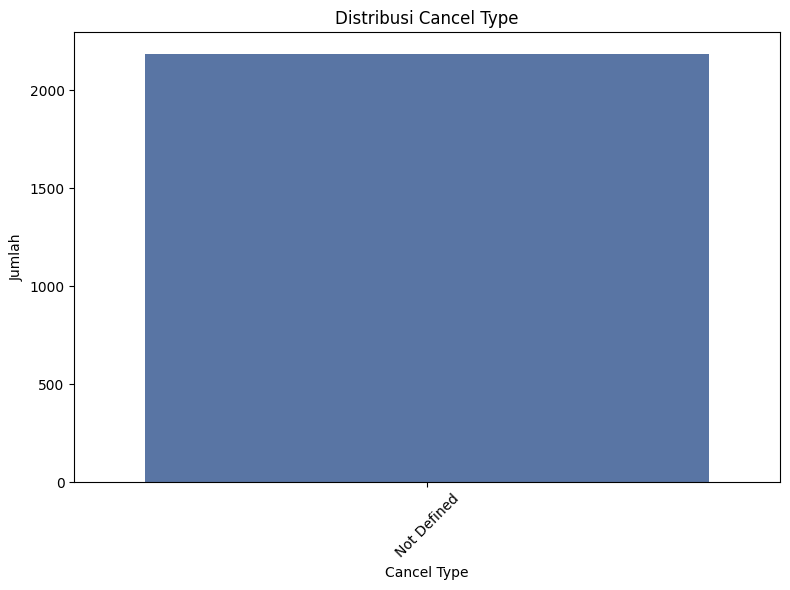

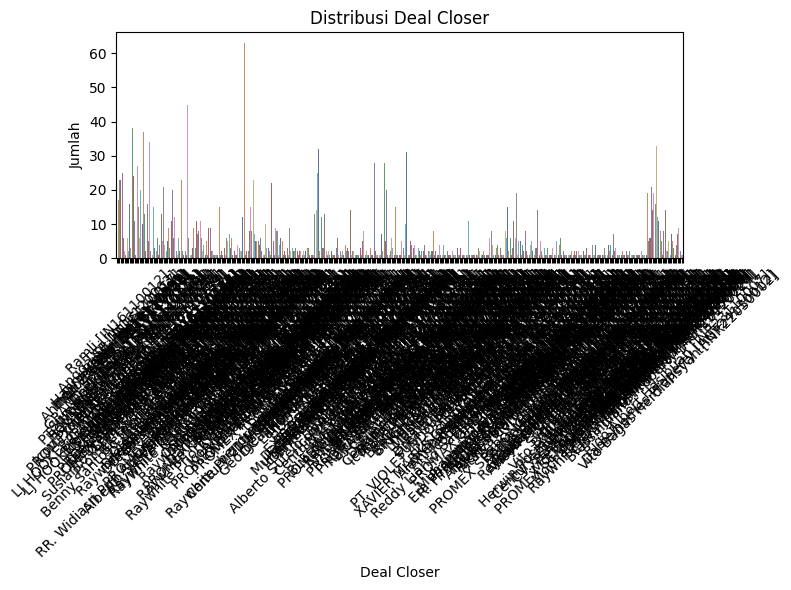

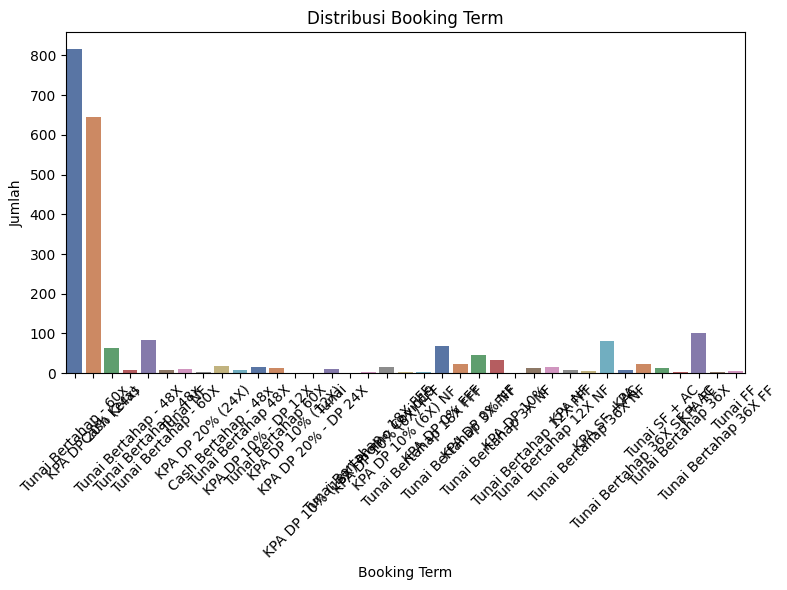

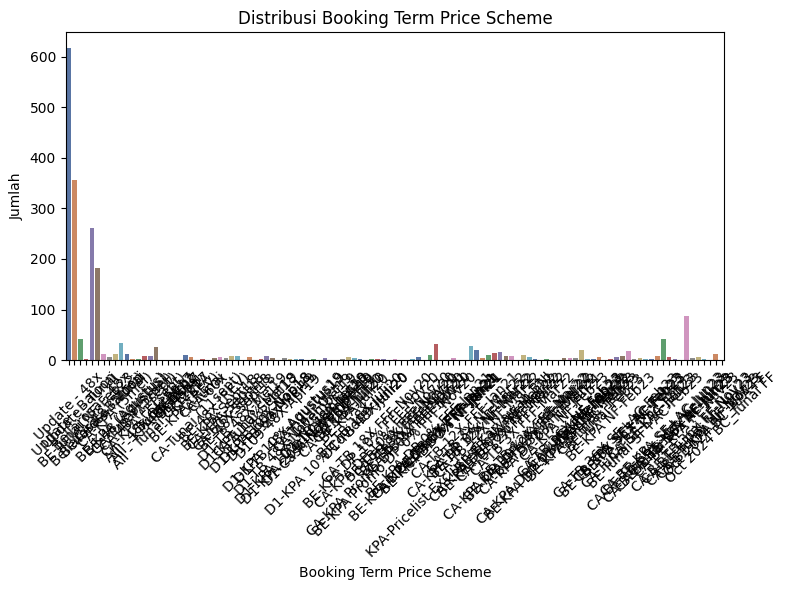

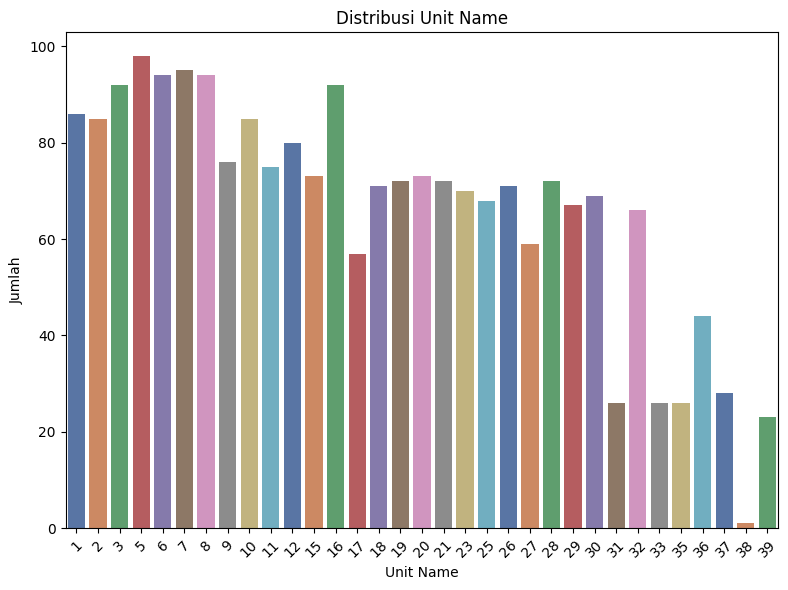

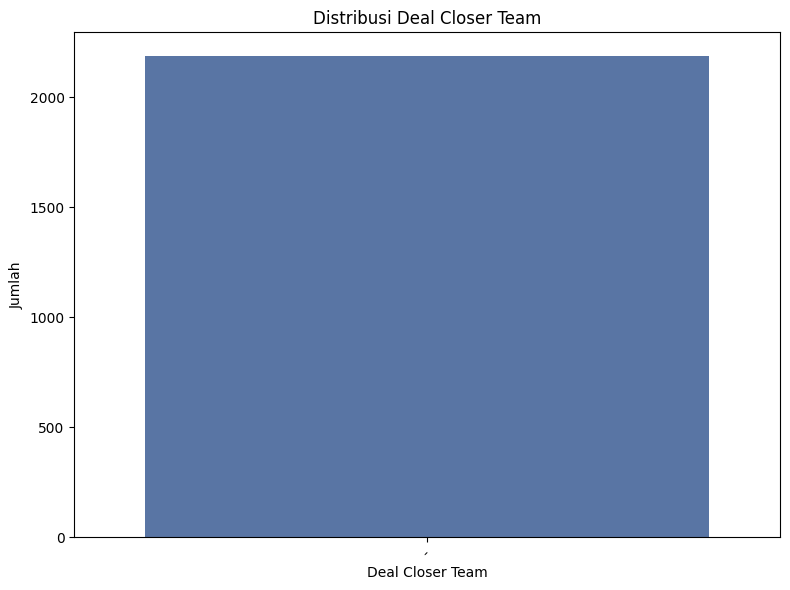

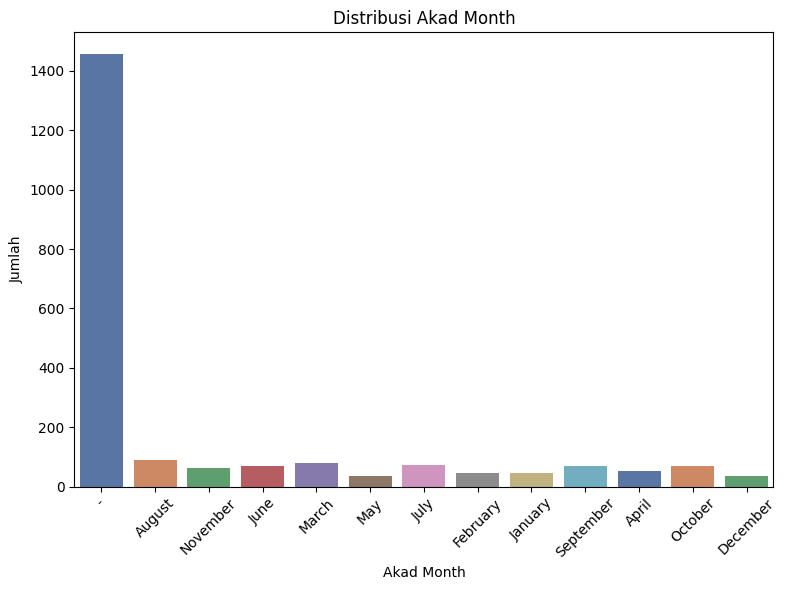

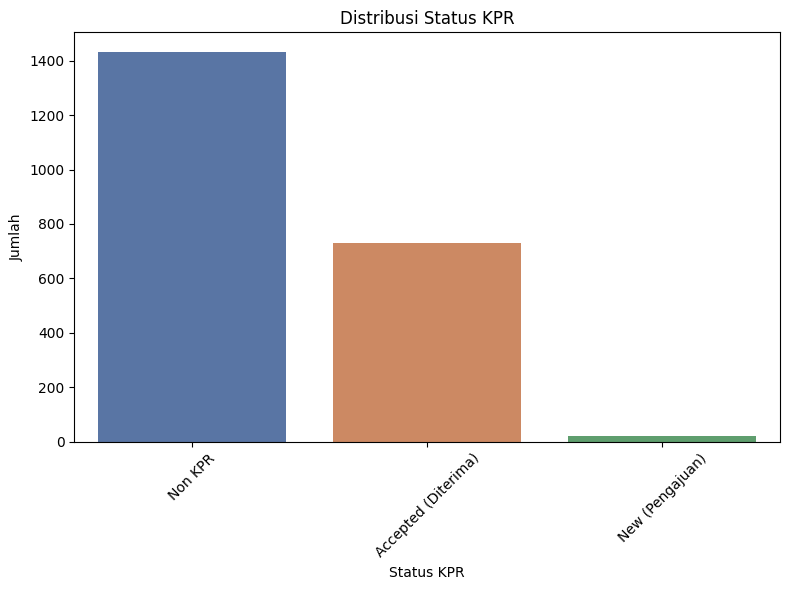

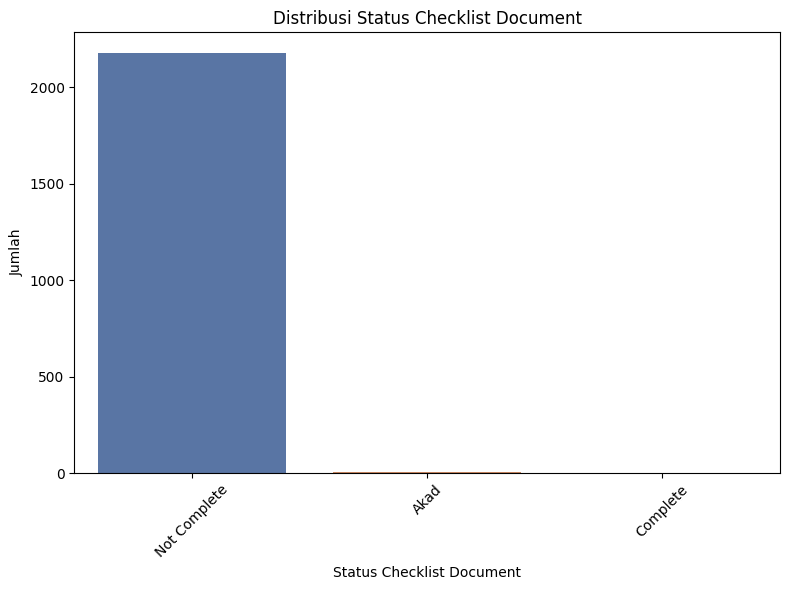

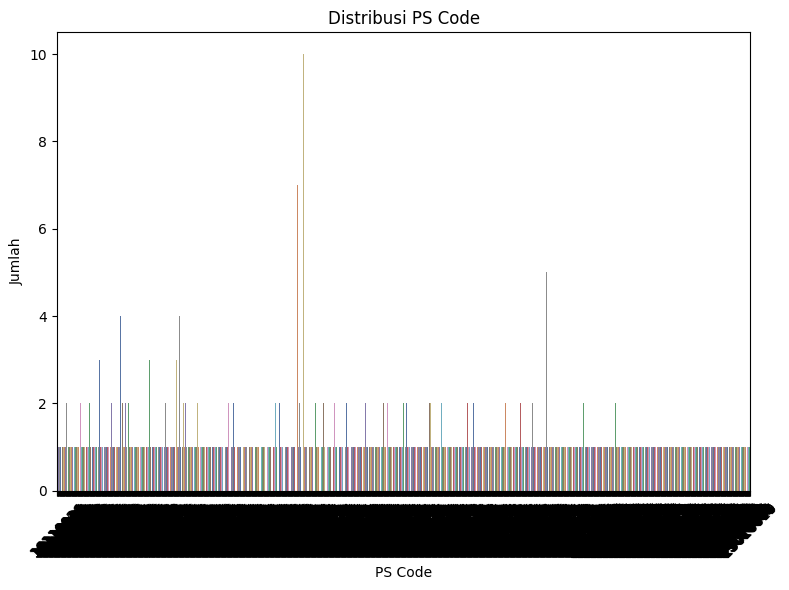

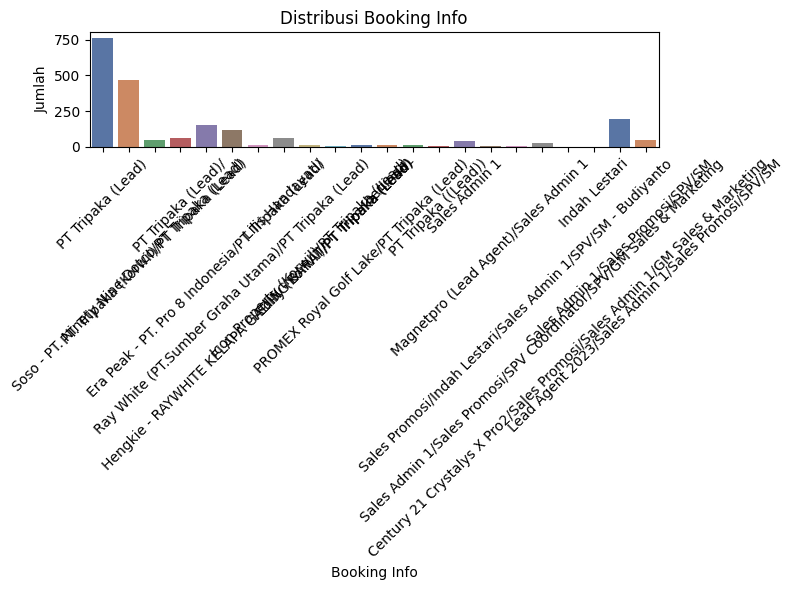

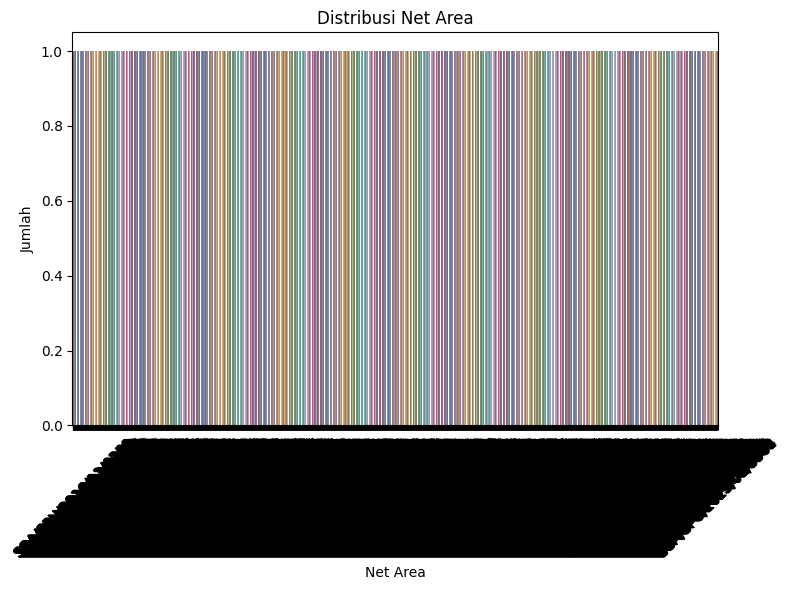

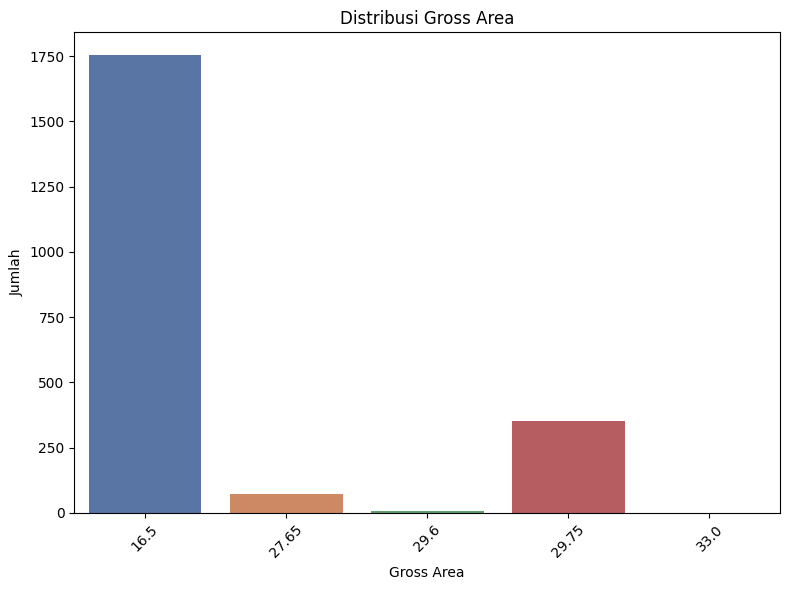

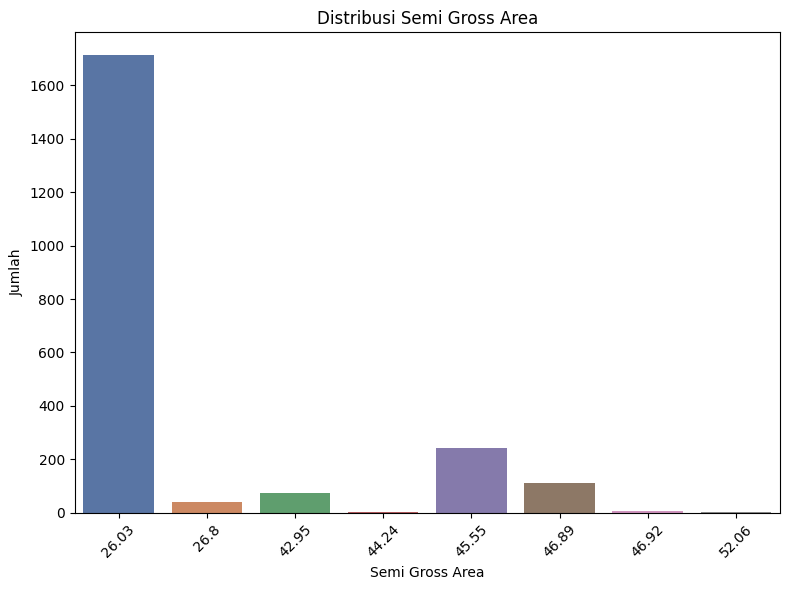

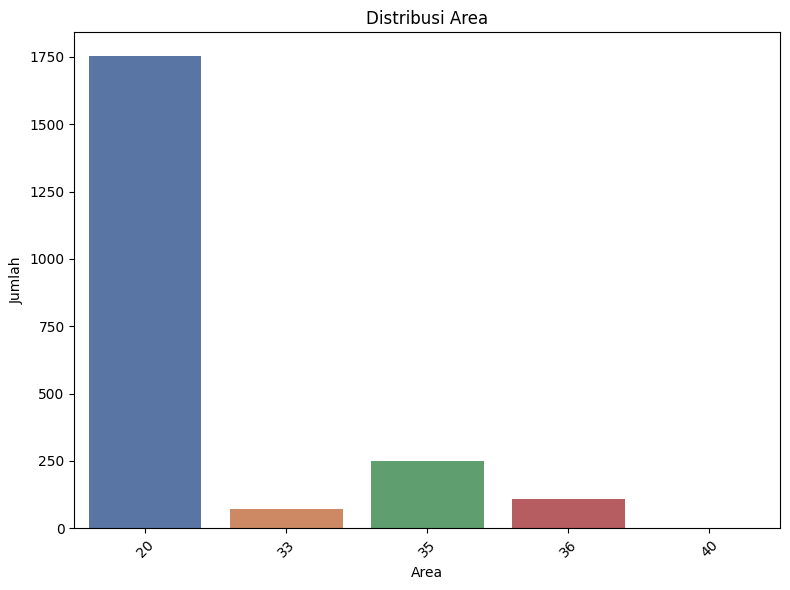

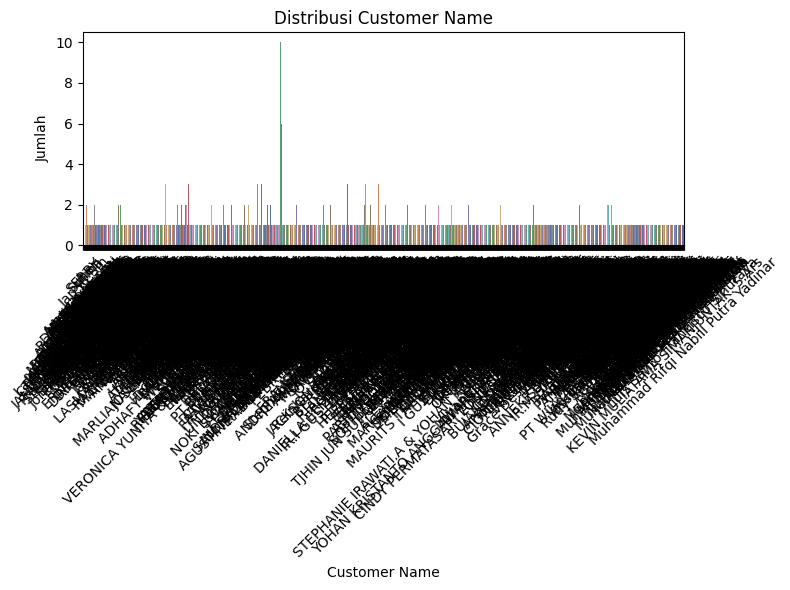

C:\Users\User\AppData\Local\Temp\ipykernel_19176\773290376.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


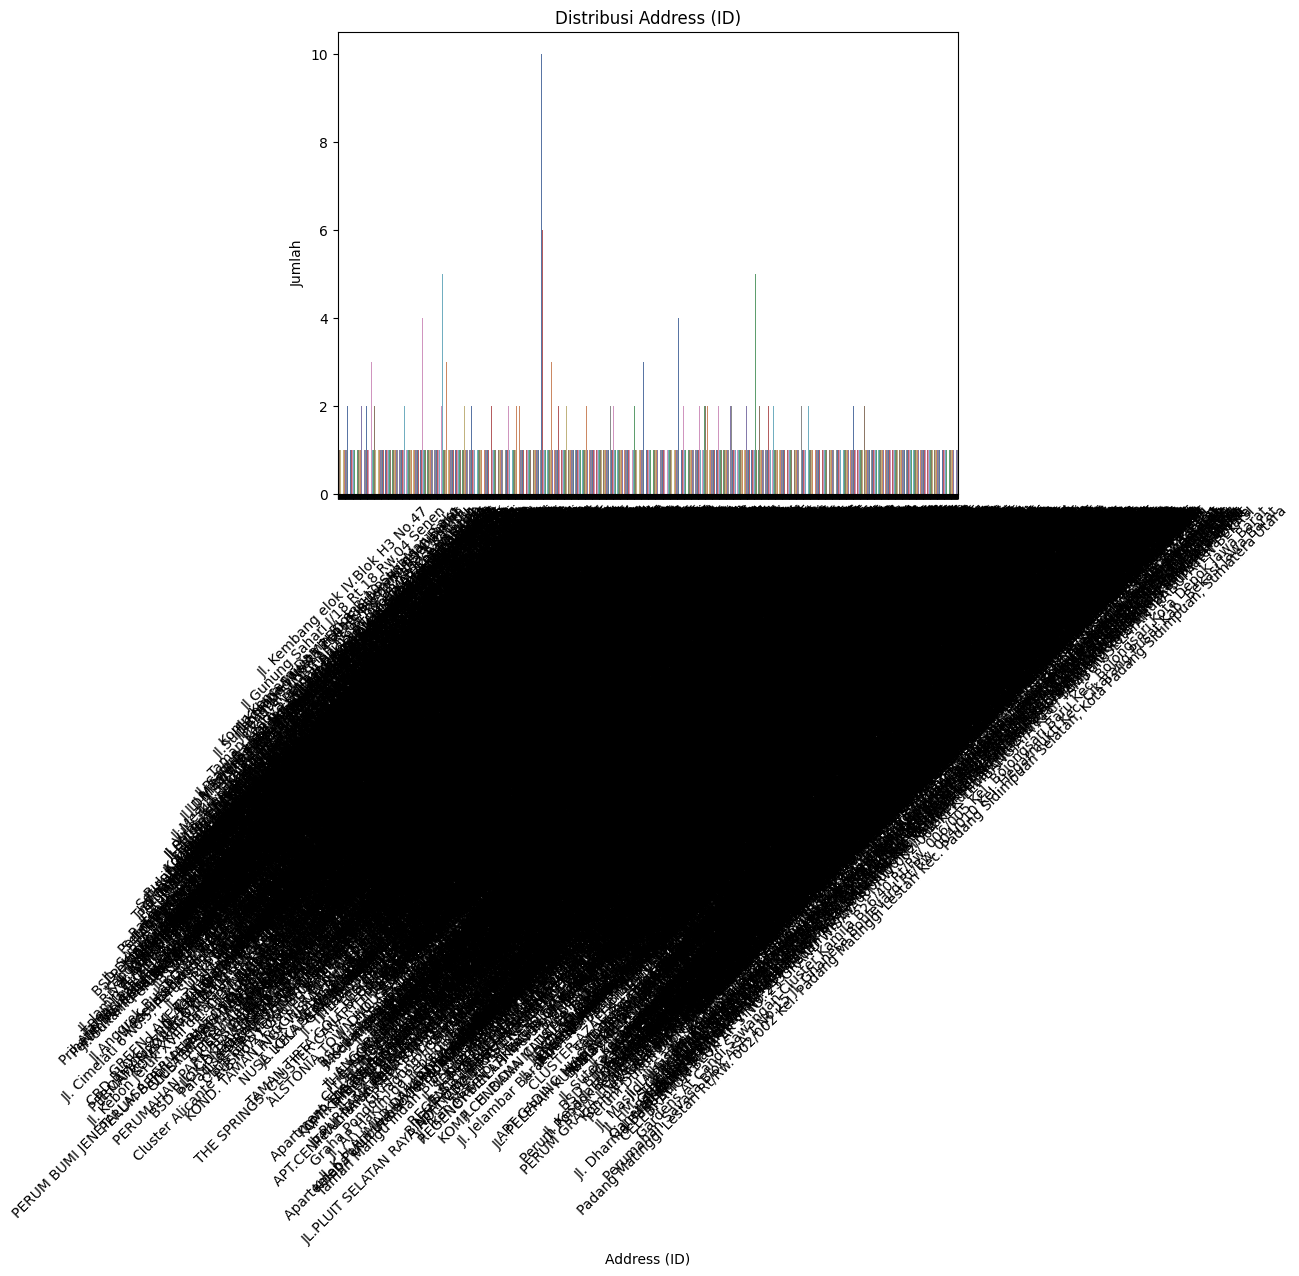

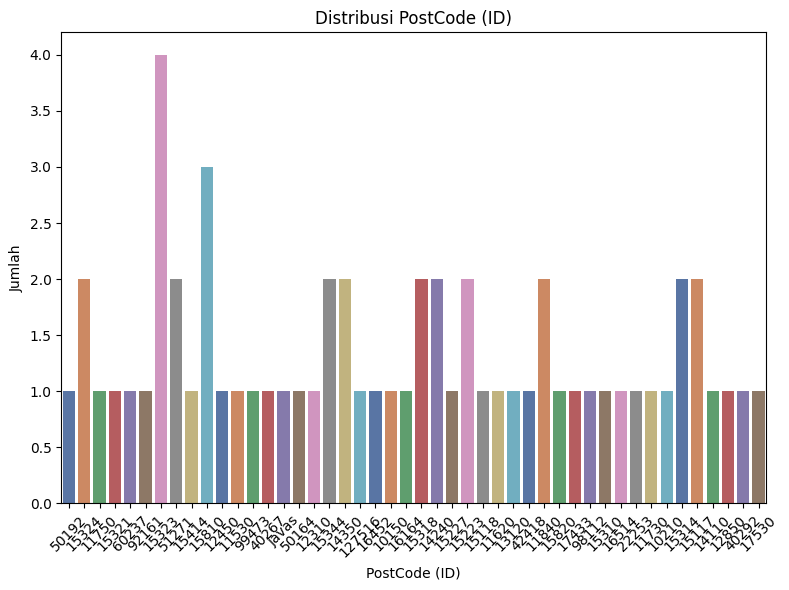

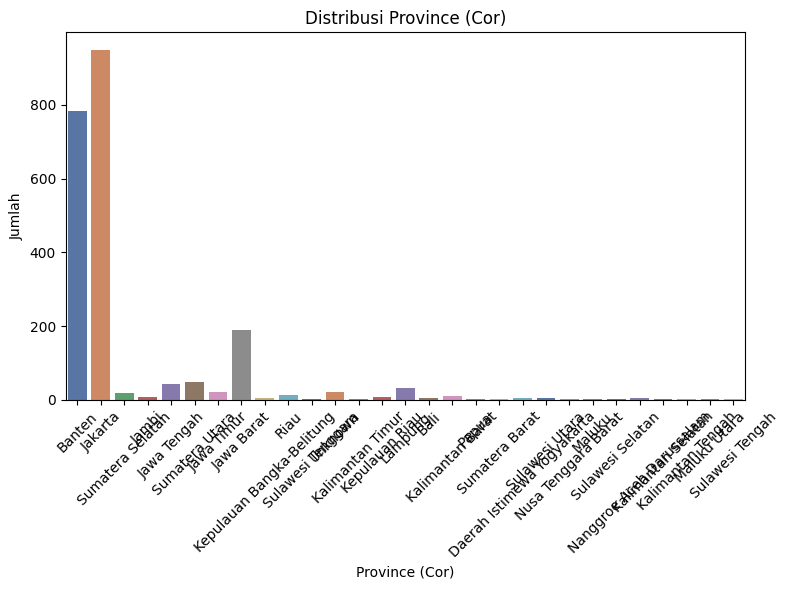

C:\Users\User\AppData\Local\Temp\ipykernel_19176\773290376.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


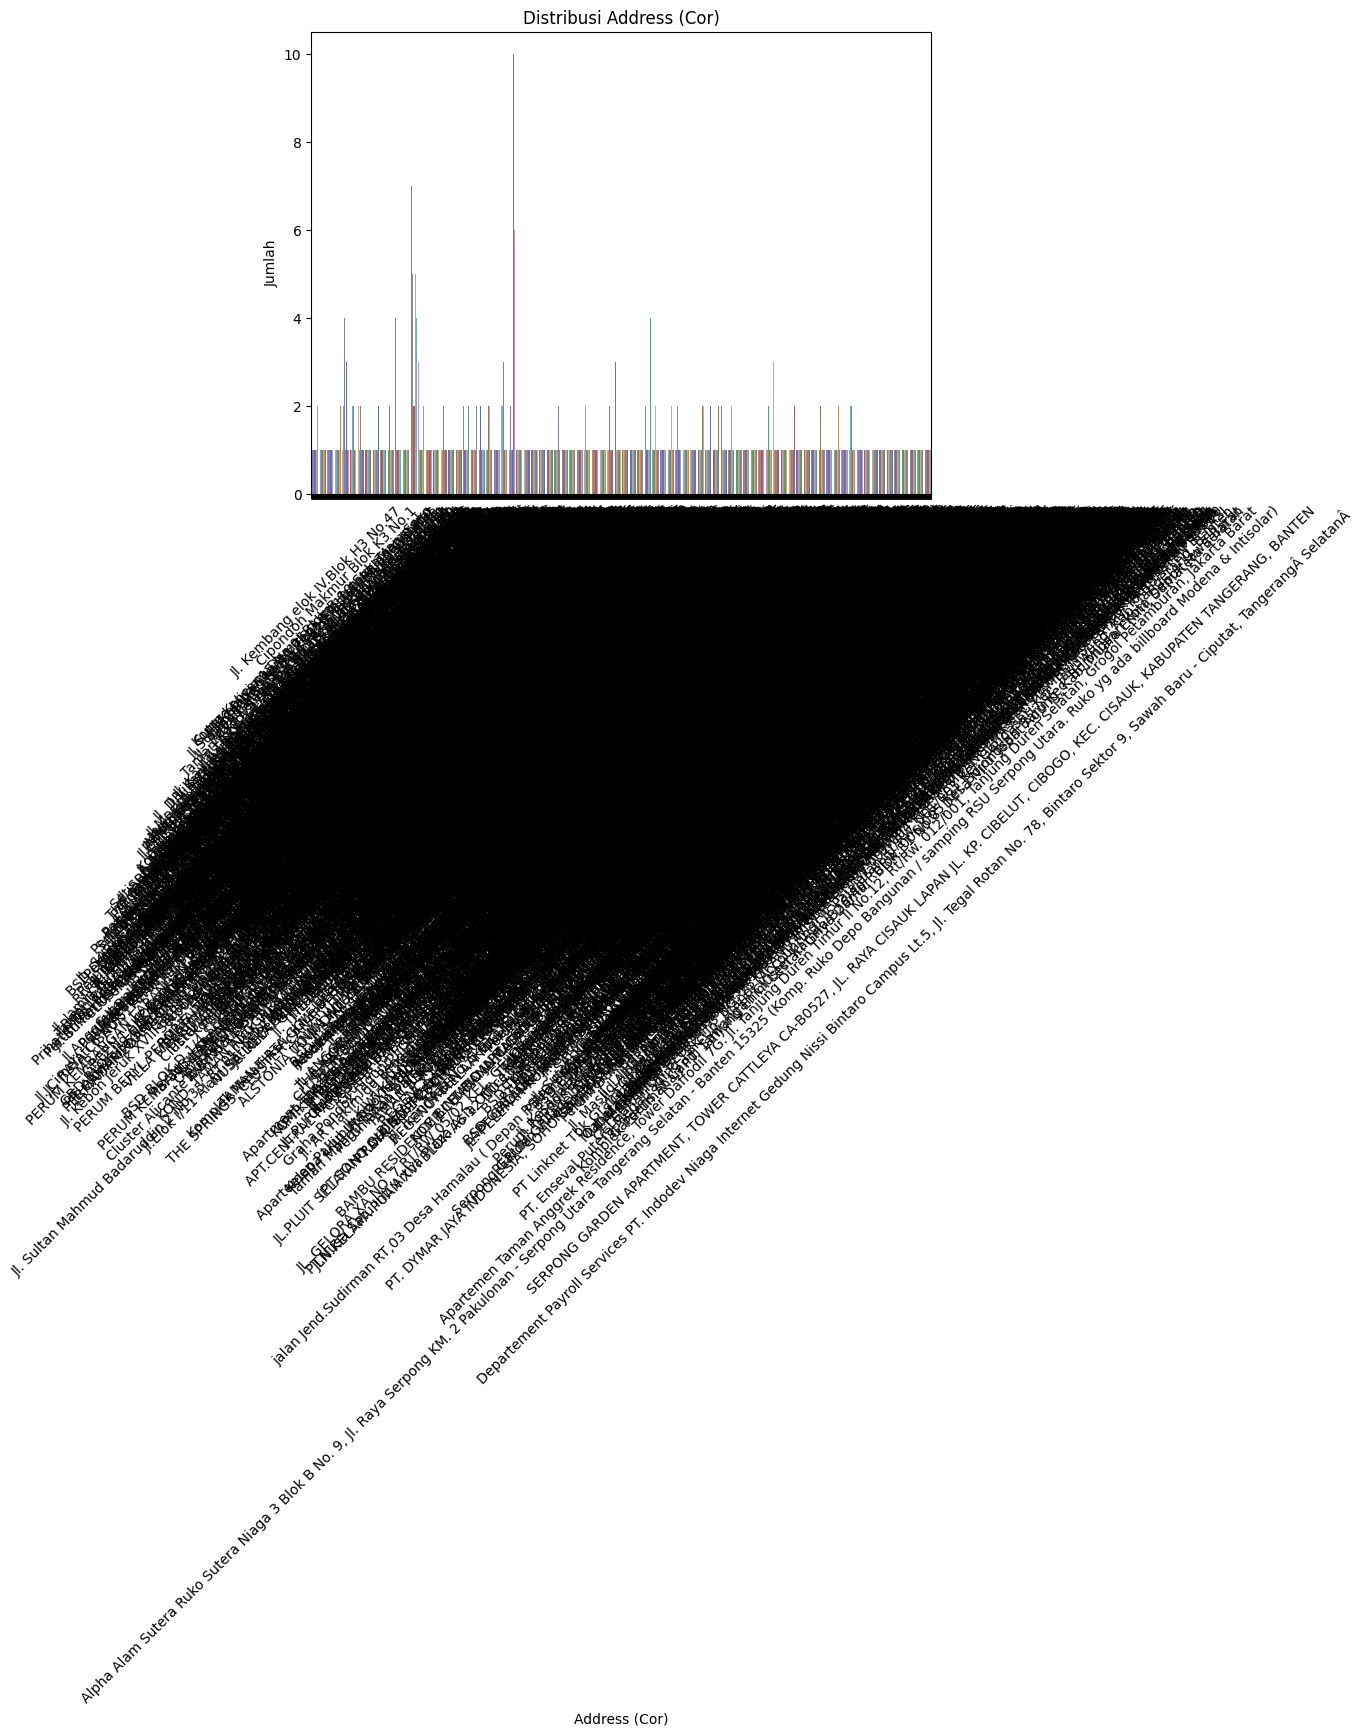

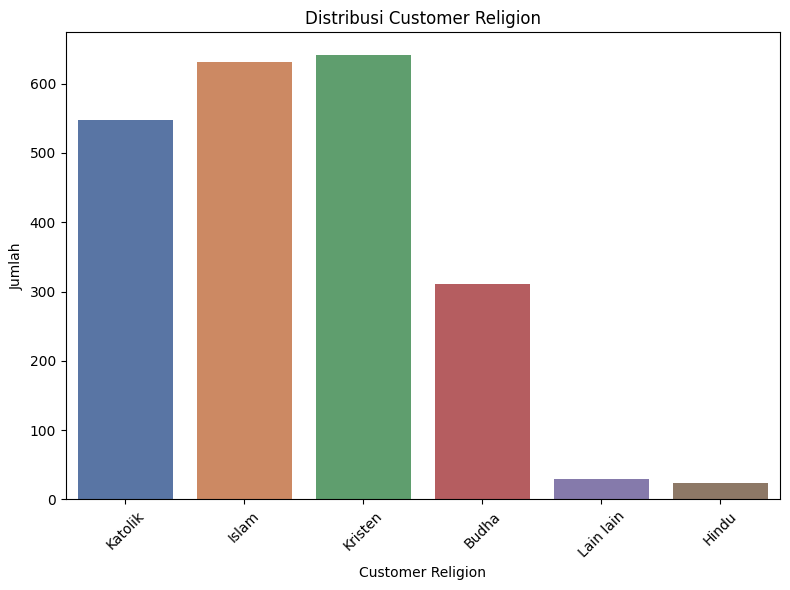

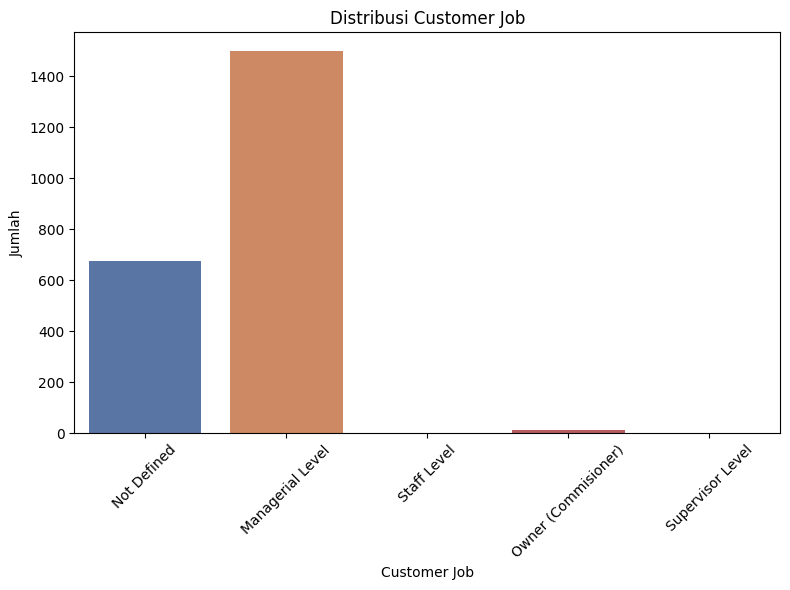

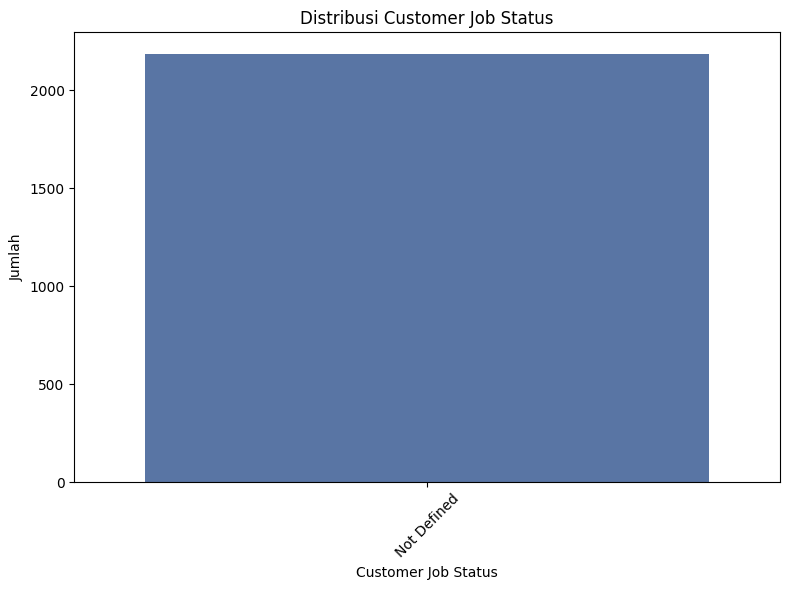

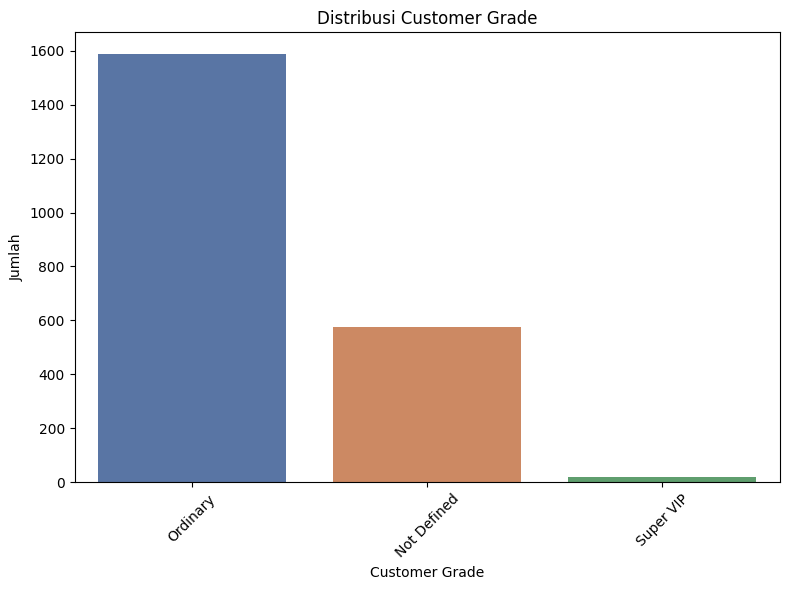

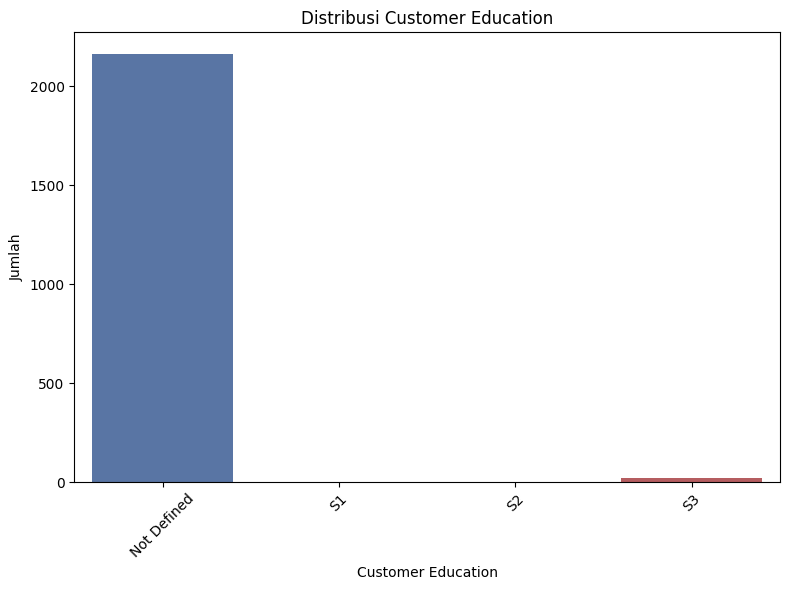

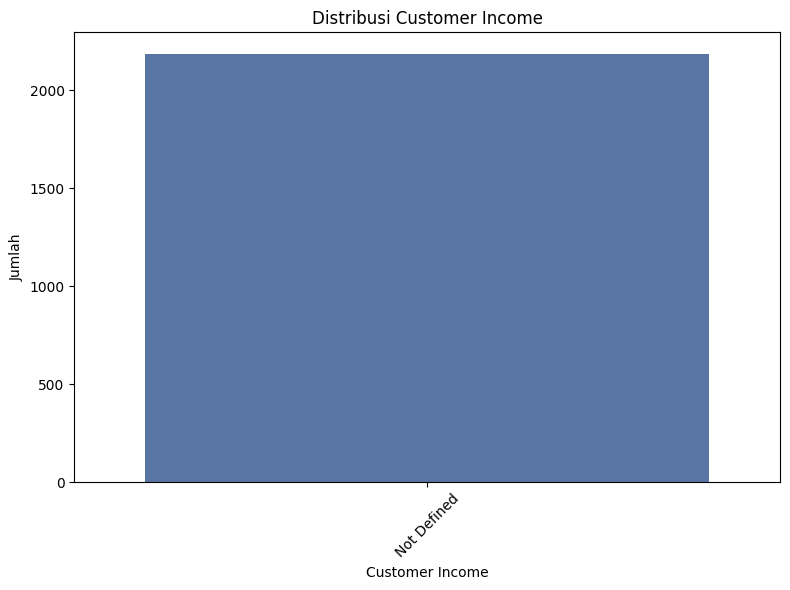

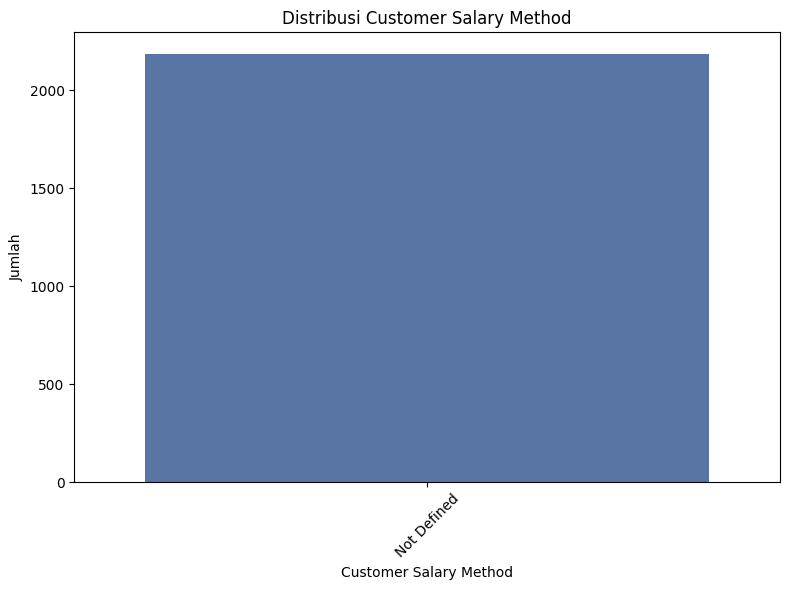

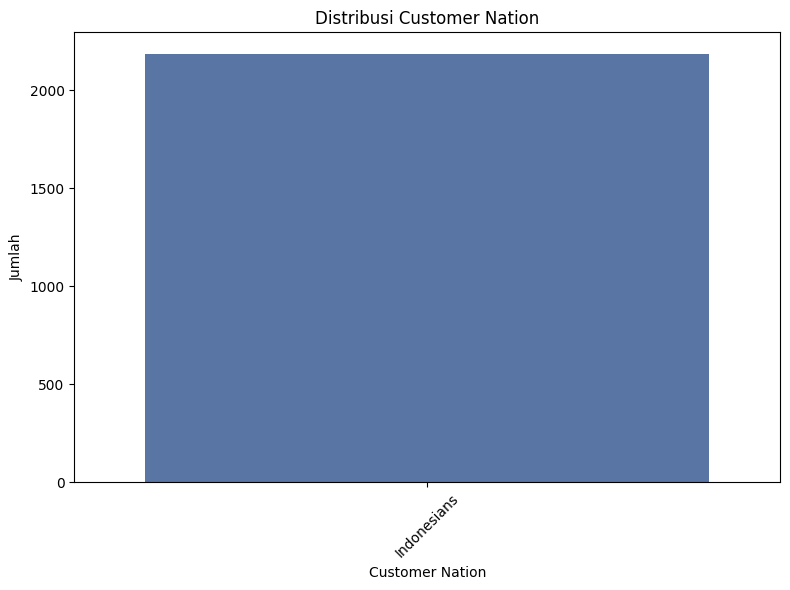

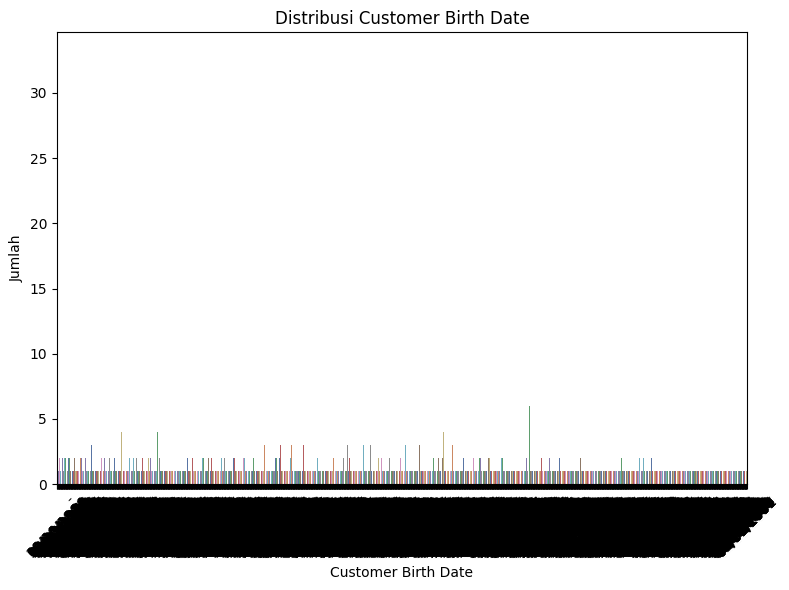

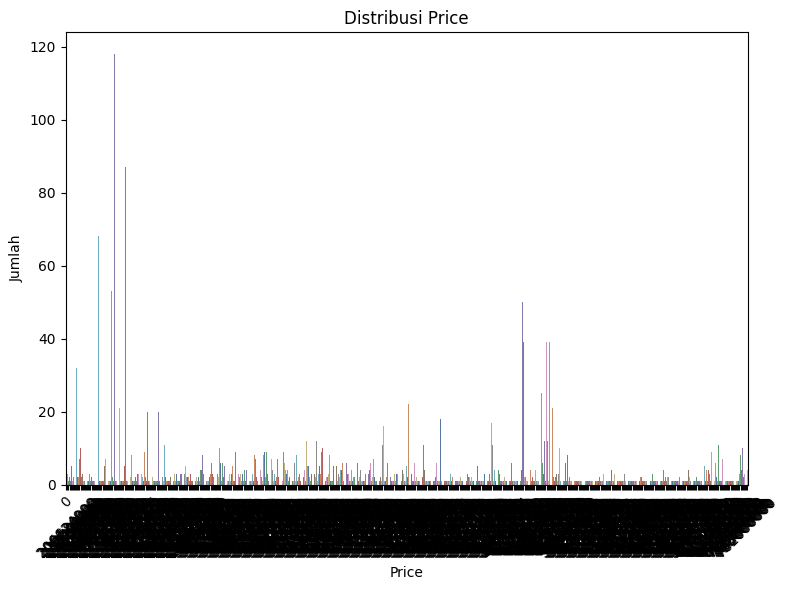

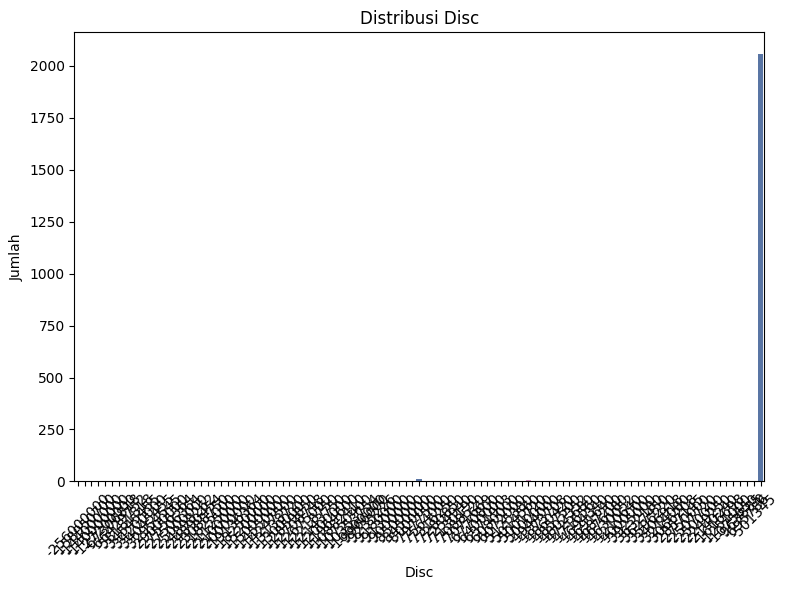

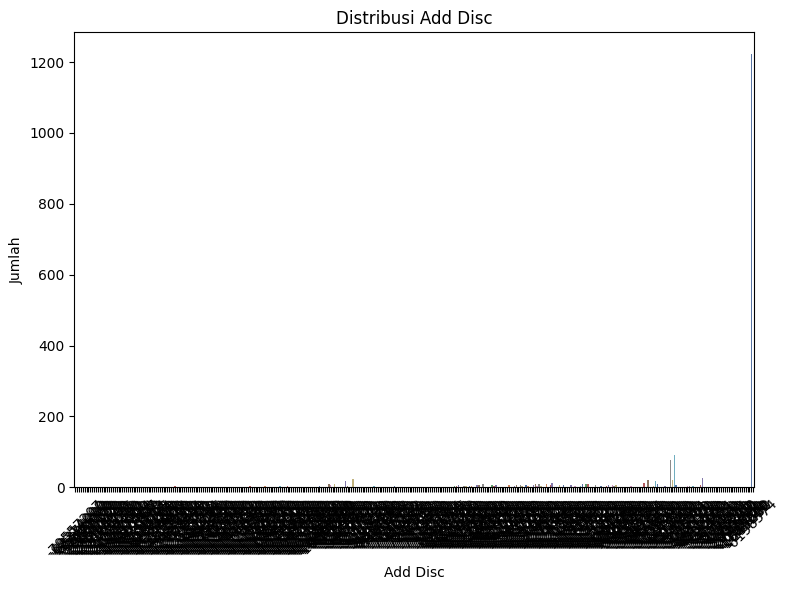

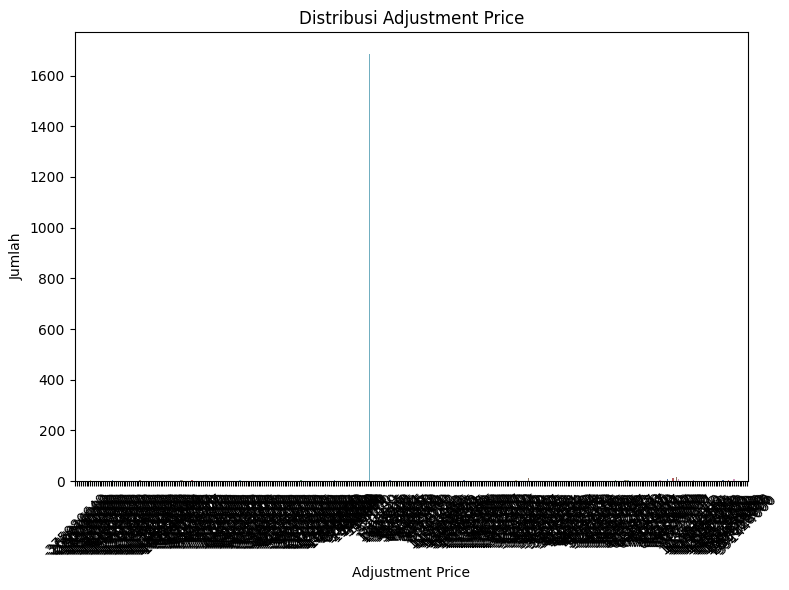

In [13]:
# Langkah 3: Data Visualization
# Membuat beberapa visualisasi dasar untuk memahami distribusi data
# Fungsi untuk membuat bar chart
def plot_bar_chart(data, column):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=data, hue=column, palette="deep", legend=False)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Membuat bar chart untuk setiap atribut
for column in df.columns:
    plot_bar_chart(df, column)


In [ ]:
# Membuat bar chart dengan perbandingan terhadap status COVID-19
def plot_stacked_bar_chart(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='COVID-19', data=data)
    plt.title(f'Distribusi {column} berdasarkan Status COVID-19')
    plt.xlabel(column)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.legend(title='COVID-19', loc='upper right')
    plt.tight_layout()
    plt.show()

# Membuat bar chart bertumpuk untuk setiap atribut (kecuali 'COVID-19')
for column in df.columns:
    if column != 'COVID-19':
        plot_stacked_bar_chart(df, column)

In [ ]:
# Menampilkan distribusi beberapa fitur kunci
fitur_kunci = ['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, fitur in enumerate(fitur_kunci):
    sns.countplot(x=fitur, hue='COVID-19', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribusi {fitur}')
plt.tight_layout()
plt.show()

In [ ]:
# Menampilkan pie chart untuk kolom COVID-19
explode = (0.2, 0)
plt.figure(figsize=(8, 6))
df['COVID-19'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=['#007BFF', '#FFA500'], shadow=True, explode=explode)
plt.title('Distribusi Kasus COVID-19')
plt.ylabel('COVID-19')
plt.show()

In [ ]:
# Encoding Variabel Kategorikal
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=[object]).columns:
    df[column] = label_encoder.fit_transform(df[column])


In [ ]:
df

In [ ]:
# Menampilkan peta panas korelasi untuk kolom numerik
kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(18, 10))
sns.heatmap(df[kolom_numerik].corr(), annot=True, cmap='coolwarm')
plt.title('Peta Panas Korelasi')
plt.show()

In [ ]:
# Langkah 5: Memisahkan Fitur dan Target
# Asumsikan kolom target bernama 'COVID-19'
X = df.drop(columns=['COVID-19'])
y = df['COVID-19']

In [ ]:
# Langkah 6: Data Balancing Menggunakan SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)


In [ ]:
# Langkah 7: Membagi Data Menjadi Set Pelatihan dan Pengujian dengan rasio 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [ ]:
# Menampilkan ringkasan dari pembagian data setelah SMOTE
print("Dimensi X_train:", X_train.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_test:", y_test.shape)

print("Distribusi kelas pada y_train:")
print(y_train.value_counts())

print("Fitur yang digunakan:", X_train.columns)

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">4. Modelling</p>

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">5. Evaluation</p>

In [ ]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Fungsi untuk plot ROC curve
def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
# Evaluasi dan visualisasi untuk setiap model
models = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Naive Bayes': nb_model,
    'SVM': svm_model,
    'KNN': knn_model
}

In [ ]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)
    
    # Plot ROC curve if model supports probability prediction
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, model_name)
    elif model_name == 'SVM':  # SVM with linear kernel uses decision_function
        y_pred_proba = model.decision_function(X_test)
        plot_roc_curve(y_test, y_pred_proba, model_name)

In [ ]:
# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)

# Evaluate Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_report_nb = classification_report(y_test, y_pred_nb)
confusion_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes Classification Report:\n", classification_report_nb)
print("Naive Bayes Confusion Matrix:\n", confusion_matrix_nb)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", classification_report_svm)
print("SVM Confusion Matrix:\n", confusion_matrix_svm)

# Evaluate KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", classification_report_knn)
print("KNN Confusion Matrix:\n", confusion_matrix_knn)



In [ ]:
# Compile all results into a dictionary for easy comparison
model_performance = {
    'Decision Tree': {
        'Accuracy': accuracy_dt,
        'Classification Report': classification_report_dt,
        'Confusion Matrix': confusion_matrix_dt
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Classification Report': classification_report_rf,
        'Confusion Matrix': confusion_matrix_rf
    },
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Classification Report': classification_report_nb,
        'Confusion Matrix': confusion_matrix_nb
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Classification Report': classification_report_svm,
        'Confusion Matrix': confusion_matrix_svm
    },
    'KNN': {
        'Accuracy': accuracy_knn,
        'Classification Report': classification_report_knn,
        'Confusion Matrix': confusion_matrix_knn
    }
}

# Display model performance
for model_name, performance in model_performance.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {performance['Accuracy']}")
    print("Classification Report:\n", performance['Classification Report'])
    print("Confusion Matrix:\n", performance['Confusion Matrix'])

# <p style="background-color:lime; font-family:calibri; color:maroon; font-size:150%; text-align:center; border-radius:15px 50px;">6. Deployment</p>

In [ ]:
import joblib

# Menyimpan model
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(nb_model, 'naive_bayes_model.pkl')
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(knn_model, 'knn_model.pkl')

In [ ]:
# Memuat model
loaded_dt_model = joblib.load('decision_tree_model.pkl')
loaded_rf_model = joblib.load('random_forest_model.pkl')
loaded_nb_model = joblib.load('naive_bayes_model.pkl')
loaded_svm_model = joblib.load('svm_model.pkl')
loaded_knn_model = joblib.load('knn_model.pkl')

In [ ]:
# Data baru untuk prediksi (sesuaikan dengan data Anda)
new_data = X_test.iloc[0].to_frame().T  # Mengambil satu baris data sebagai contoh

# Prediksi menggunakan model yang telah dimuat
prediction_dt = loaded_dt_model.predict(new_data)
prediction_rf = loaded_rf_model.predict(new_data)
prediction_nb = loaded_nb_model.predict(new_data)
prediction_svm = loaded_svm_model.predict(new_data)
prediction_knn = loaded_knn_model.predict(new_data)

# Menampilkan hasil prediksi
print(f"Decision Tree Prediction: {'Positif' if prediction_dt[0] == 1 else 'Negatif'}")
print(f"Random Forest Prediction: {'Positif' if prediction_rf[0] == 1 else 'Negatif'}")
print(f"Naive Bayes Prediction: {'Positif' if prediction_nb[0] == 1 else 'Negatif'}")
print(f"SVM Prediction: {'Positif' if prediction_svm[0] == 1 else 'Negatif'}")
print(f"KNN Prediction: {'Positif' if prediction_knn[0] == 1 else 'Negatif'}")